# Ciência dos Dados
## Projeto 2 - Walmart
### Integrantes do Grupo

* Antônio Amaral Egydio Martins
* Arthur Martins de Souza Barreto

### Professor Orientador
* Maria Kelly Venezuela

___

### Índice

- [Contextualização](#Contextualização)
- [Objetivo](#Objetivo)
- [Introdução](#Introdução)
- [Análise Exploratoria](#Analise_Exploratoria)
    - [Visualização Gráfica](#Visualização_Gráfica)
    - [Interpretação Gráficos Temporais](#Interpretação_Gráficos_Temporais)
    - [Histograma](#Histograma)
    - [Gráficos de Correlação](#Gráfics_de_Correlação)
    - [DataFrame de Correlações](#DataFrame_de_Correlações)
    - [Comportamento perante distribuição](#Comportamento_perante_distribuição)
- [Construção da Base de Dados](#Construção_da_Base_de_Dados)
- [Aprofundamento conceitual:](#Aprofundamento_Conceitual)
    - [Scikit-Learn](#Scikit-Learn)
    - [Machine Learning](#Machine_Learning)
    - [Data Mining](#Data_Mining)
    - [Linear Regression - Modelo 1](#Linear_Regression_Modelo1)
    - [Decision Tree Regressor - Modelo 2](#Decision_Tree_Regressor_Modelo2)
    - [Random Forest Regressor - Modelo 3](#Random_Forest_Regressor_Modelo_3)
    - [Validação cruzada](#Validação_cruzada)
    - [Explained variance score](#Explained_variance_score)
- [Construção do Modelo](#Construção_do_Modelo)
- [Regressão Linear - Modelo 1](#Regressão_Linear)
- [Validação Cruzada - Modelo 1](#Validação_Cruzada_Modelo_1)
- [Decision Tree Regressor - Modelo2](#Decision_Tree_Regressor)
- [Validação Cruzada - Modelo 2](#Validação_Cruzada_Modelo_2)
- [Random Tree Regressor - Modelo 3](#Random_Tree_Regressor)
- [Validação Cruzada - Modelo 3](#Validação_Cruzada_Modelo_3)
- [Análise dos Modelos:](#Análise_dos_Modelos)
    - [Sobreposição - r²](#Sobreposição_r²)
    - [Sobreposição - Erro quadrático médio](#Sobreposição_Erro_quadrático_médio)
    - [Sobreposição - Explained Variance Score](#Sobreposição_Explained_Variance_Score)
    - [Sobreposição - Erro máximo absoluto](#Sobreposição_Erro_máximo_absoluto)
    - [Importância Relativa de Feature em Target](#Importância_Relativa_de_Feature_em_Target)
- [Conclusão](#Conclusão)
- [Referências](#Referências)


___
<div id="Contextualização"></div>

### Contextualização
No contexto hodierno temos o homem como uma máquina consumidora, vivemos em mundo muito globalizado, podemos comprar qualquer coisa com alguns passos fora de casa. Nesse contexto, esse projeto visa analisar as vendas da rede Walmart dos Estados Unidos, eleita a maior multinacional americana em 2010. Outro fato interessante é que em 2009 a rede foi responsável por 51% dos lucros provindos de mercearias nos EUA.

A rede tem mais de 11000 lojas, operando em mais de 27 países diferentes, com até 55 nomes diferentes. Definitivamente é uma grande potência mundial no mercado de varejo. Nesse viés, este projeto analisará a influência dos fatores externos nas vendas da rede Walmart, e a partir deles construir modelos de predição para os meses seguintes.

Portanto, queremos responder como esses fatores influenciam nas vendas semanais e poder predizer como as vendas se comportaram no futuro a partir dos dados coletados até o momento, a nossa base de dados.


<img src="img/walmart.jpg" width=75%>
___
<div id="Objetivo"></div>
### Objetivo 
Assim como supracitado, buscamos entender como o meio interno e externo impactam diretamente na quantidade de itens vendidos no Walmart nos Estados Unidos entre 5/2/2010 até 1/11/2012 (período que a base de dados abrange). Sendo assim para este projeto utilizaremos como features:

Variável | Descrição
:---:|---:
Store | ID de Reconhecimento das Lojas
Weekly_Sales | Vendas Semanais
Holiday_Flag | Variável Booleana para Feriados 
Temperature | Temperatura Exterior as lojas (Fahrenheit)
Fuel_Price | Preço do Galão de Combustível (USD)
CPI (Prevailing consumer price index) | Unidade utilizada para medir inflação
Unemployment | Taxa de Desemprego (%)

<center>A variável *Holiday_Flag* identifica se é feriado ou não de forma Booleana.</center>

Valor | Significado
:---:|:---:
0 | É Feriado
1 | Não é Feriado


Deste modo, queremos analisar como esses fatores influenciam nas vendas semanais e poder prever as vendas futuras a partir dos dados coletados. 
    
#### Sobre a base de dados:
<Br> A base de dados pode ser encontrada no seguinte link:
<Br> https://www.kaggle.com/rutuspatel/walmart-dataset-retail
<Br> O site kaggle é uma plataforma que disponibiliza muitas bases de dados, é uma ótima ferramenta para pesquisa e ter ideias para projetos interessantes.


____
<div id="Introdução"></div>

### Introdução
* Instalação dos módulos a serem utilizados

In [2]:
# descomente a linha a baixo para baixar o pacote skleran caso não tenha instalado ainda no seu pc
# pip install -U scikit-learn
# para mais detalhes sobre a instalação da biblioteca acesse o link a baixo:
# https://scikit-learn.org/stable/install.html

In [3]:
# importanto as bibliotecas utilizadas

%matplotlib inline
# verificação de diretorio
import os
# biblioteca de analise de banco de dados
import pandas as pd
# biblioteca auxiliar para analise dos dados
import numpy as np
# bibliotecas graficas
import matplotlib.pyplot as plt
# bibliotecas para analize e predições
from sklearn.model_selection import train_test_split
# Modelo de regresão linear
from sklearn import linear_model
# metricas sklearn
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error
#Modelo DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
#Modelo Random Forest
from sklearn.ensemble import RandomForestRegressor
# biblioteca para validação cruzada do modelo
from sklearn.model_selection import cross_val_score
#ProbPlot
from scipy.stats import probplot
#Parte Stats do Sciypy
from scipy import stats

* Importando base de dados

In [4]:
#Checando Diretório 
print("Esperamos trabalhar no diretório")
print(os.getcwd())

Esperamos trabalhar no diretório
/Users/antonioamaralegydiomartins/Desktop/Antônio/GitHub - Pessoal/INSPER/Formula1_predicting_lap_time


In [5]:
# lendo a base de dados e primeiras impressões
df = pd.read_csv('Walmart_Store_sales.csv')
df.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

Todos os dados são medias semanais, ou seja, a temperatura é a média da temperatura naquela semana, bem como as vendas semanais e o restante das variáveis.
<b> <Br> Agora vamos tomar algumas medidas iniciais da base de dados, e tomar as impressões iniciais do projeto.

In [6]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

Como não temos dados nulos/invalidos, podemos prosseguir com a analise da base de dados. Vejamos alguns dados básicos:

In [7]:
df.describe()

Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000

<Br> A linha count (contagem) não é muito informativa, pois queremos analisar o comportamento médio das variáveis, além do que não faz sentido somar uma variável booleana (verdadeiro ou falso), o caso de Holiday_Flag.
<Br> Já a linha de média traz resultados mais interessantes, como por exemplo que neste período a taxa média de desemprego, próxima dos 8%. Também temos que a média nesses períodos, das vendas foi de cerca de 1 milhão de dólares, contrastando com a venda mínima, de 560 mil dólares e a venda máxima de 3.8 milhões de dólares.
<b><Br>Portanto, percebemos que temos um comportamento bastante heterogêneo no nosso grupo de 45 lojas, vamos analisar mais a fundo cada situação.

<b> Iniciando a análise, primeiro vamos definir as funções utlizadas no nosso código. 

#### Funções 

In [45]:
# Função para definir o grupo dado a correlação da loja
def grupo(Data):
    # se correlação da temperatura for menor que -0.3, temos o grupo -1, correlaçãoo modera forte negativa
    if Data < -0.3:
        return -1
    # se for maior que 0.4, temos o grupo 1, correlação moderada forte positica
    elif Data > 0.3:
        return 1
    else:
        # caso contrario, temos o grupo 0, ou seja, correlação fraca, seja negativa ou positiva
        return 0

def lista_datas ():
    Dados = df.loc[df["Store"]==1,:]
    Date = Dados["Date"]
    Date.sort_values()
    return Date.tolist()

def correlacao (DataFrame,indicadores, target, store):#Criando Dicionario Principal - Será Base do Novo DataFrame de Correlações
    principal = {}
    dads = DataFrame
    for loja in range(1,46):
        #Dicionario Index
        secundario = {}
        #Separando dados de lojas individuais
        Dados = dads.loc[dads[store]==loja,:]
        for indicador in indicadores:
            #Pegando Dados de Indicadores escolhidos da Loja Inputada e adicionando ao Index
            corr = Dados[target].corr(Dados[indicador])
            secundario[indicador] = corr
        principal[loja] = secundario
    X_Data = pd.DataFrame.from_dict(principal).transpose()
    return X_Data

def dados_grafico_holiday_flag_data(DataFrame):
    #Separando Dados Para Plot de Weekly Sales e Holiday Flag
    DFhf = DataFrame.loc[DataFrame["Store"]==1,:]
    data_2010_2011 = DFhf.loc[DFhf["Date"] <= "2010-10-02"]
    data_2010_2011 = DFhf.loc[DFhf["Date"] >= "2011-07-01"].sort_values(by="Date")
    data_2011_2012 = DFhf.loc[DFhf["Date"] <= "2011-10-7"]
    data_2011_2012 = DFhf.loc[DFhf["Date"] >= "2012-01-27"].sort_values(by="Date")
    #Definindo Listas
    B2 = []
    B2T = []
    B = []
    BT = []
    L_Index = data_2010_2011["Weekly_Sales"].index
    L_Index2 = data_2011_2012["Weekly_Sales"].index
    #Utilizando For e If para reconhecer os pontos em que Holiday Flag = 1.
    for e in L_Index:
        if data_2010_2011["Holiday_Flag"][e] == 1:
            B.append(data_2010_2011["Weekly_Sales"][e])
            BT.append(data_2010_2011["Date"][e])

    for e in L_Index2:
        if data_2011_2012["Holiday_Flag"][e] == 1:
            B2.append(data_2011_2012["Weekly_Sales"][e])
            B2T.append(data_2011_2012["Date"][e])
    return B2, B2T, B, BT, data_2010_2011["Date"], data_2011_2012["Date"], data_2010_2011["Weekly_Sales"], data_2011_2012["Weekly_Sales"]

def dados_grafico_hf(DataFrame):
        #Separando Dados Para Plot de Weekly Sales e Holiday Flag
    DFhf = DataFrame.loc[DataFrame["Store"]==1,:]
    DFhf = dft.sort_values(by="Date")
    #Definindo Listas
    B = []
    BT = []
    L_Index = DFhf["Weekly_Sales"].index
    #Utilizando For e If para reconhecer os pontos em que Holiday Flag = 1.
    for e in L_Index:
        if DFhf["Holiday_Flag"][e] == 1:
            B.append(DFhf["Weekly_Sales"][e])
            BT.append(DFhf["Date"][e])
            
    return B, BT

def variavel_baixa (DataFrame, feature):
    #Definindo DataFrame recebico
    DFpreco = DataFrame
    #Banco de Variaveis
    loja_menor = 1e10
    ID_menor = 0
    loja_maior = 0
    ID_maior = 0
    #Index - Reconhecimento das posições
    Index = DFpreco[feature].index
    for e in Index:
        if DFpreco[feature][e] > loja_maior:
            loja_maior = DFpreco[feature][e]
            ID_maior = DFpreco["Store"][e]
        if DFpreco[feature][e] < loja_menor:
            loja_menor = DFpreco[feature][e]
            ID_menor = DFpreco["Store"][e]
    lojas = []
    lojas.append(ID_menor)
    lojas.append(ID_maior)
    menor_variavel = []
    maior_variavel = []
    porcentagem = []
    for loja in lojas:
        Dados = DFpreco.loc[DFpreco["Store"]==loja,:]
        minimo = Dados[feature].min()
        maximo = Dados[feature].max()
        menor_variavel.append(minimo)
        maior_variavel.append(maximo)
        porcentagem.append((maximo/minimo)*100)
   
    #Lojas Menor = [0] e Maior = [1]
    return lojas, porcentagem

def lojas_proximidades_um(variavel):
    feature = []
    ids = []
    for e in range(len(variavel)):
        if variavel[e]<= 1 and variavel[e]>=0.9:
            feature.append(variavel[e])
            ids.append(e)
    return ids

___

<div id="Analise_Exploratoria"></div>

### Análise Exploratória

Após o término do carregamento da base de dados, e a checagem da integridade dos dados que serão utilizados. Haverá o início da Análise Exploratória que terá foco inicial em apresentar informações básicas sobre as Features e Target utilizadas.

#### Target:
    - Weekly Sales
#### Features:
    - Holiday Flag
    - Temperature
    - Fuel Price
    - CPI
    - Unemployment
    
___

<div id="Visualização_Gráfica"></div>

#### Visualização Gráfica

Nesta Seção será realizado o Plot de Gráficos Temporais e Correlacionais, para estabelecer a apresentação visual dos dados com relação ao tempo, e já pré-definir correlações entre eles.

As <b>Features</b> usadas serão:
* `Temperature`
* `Fuel_Price`
* `CPI`
* `Unemployment`

E da Variavel principal <b>Target</b>:
* `Weekly_Sales`

`Gráficos Temporais`

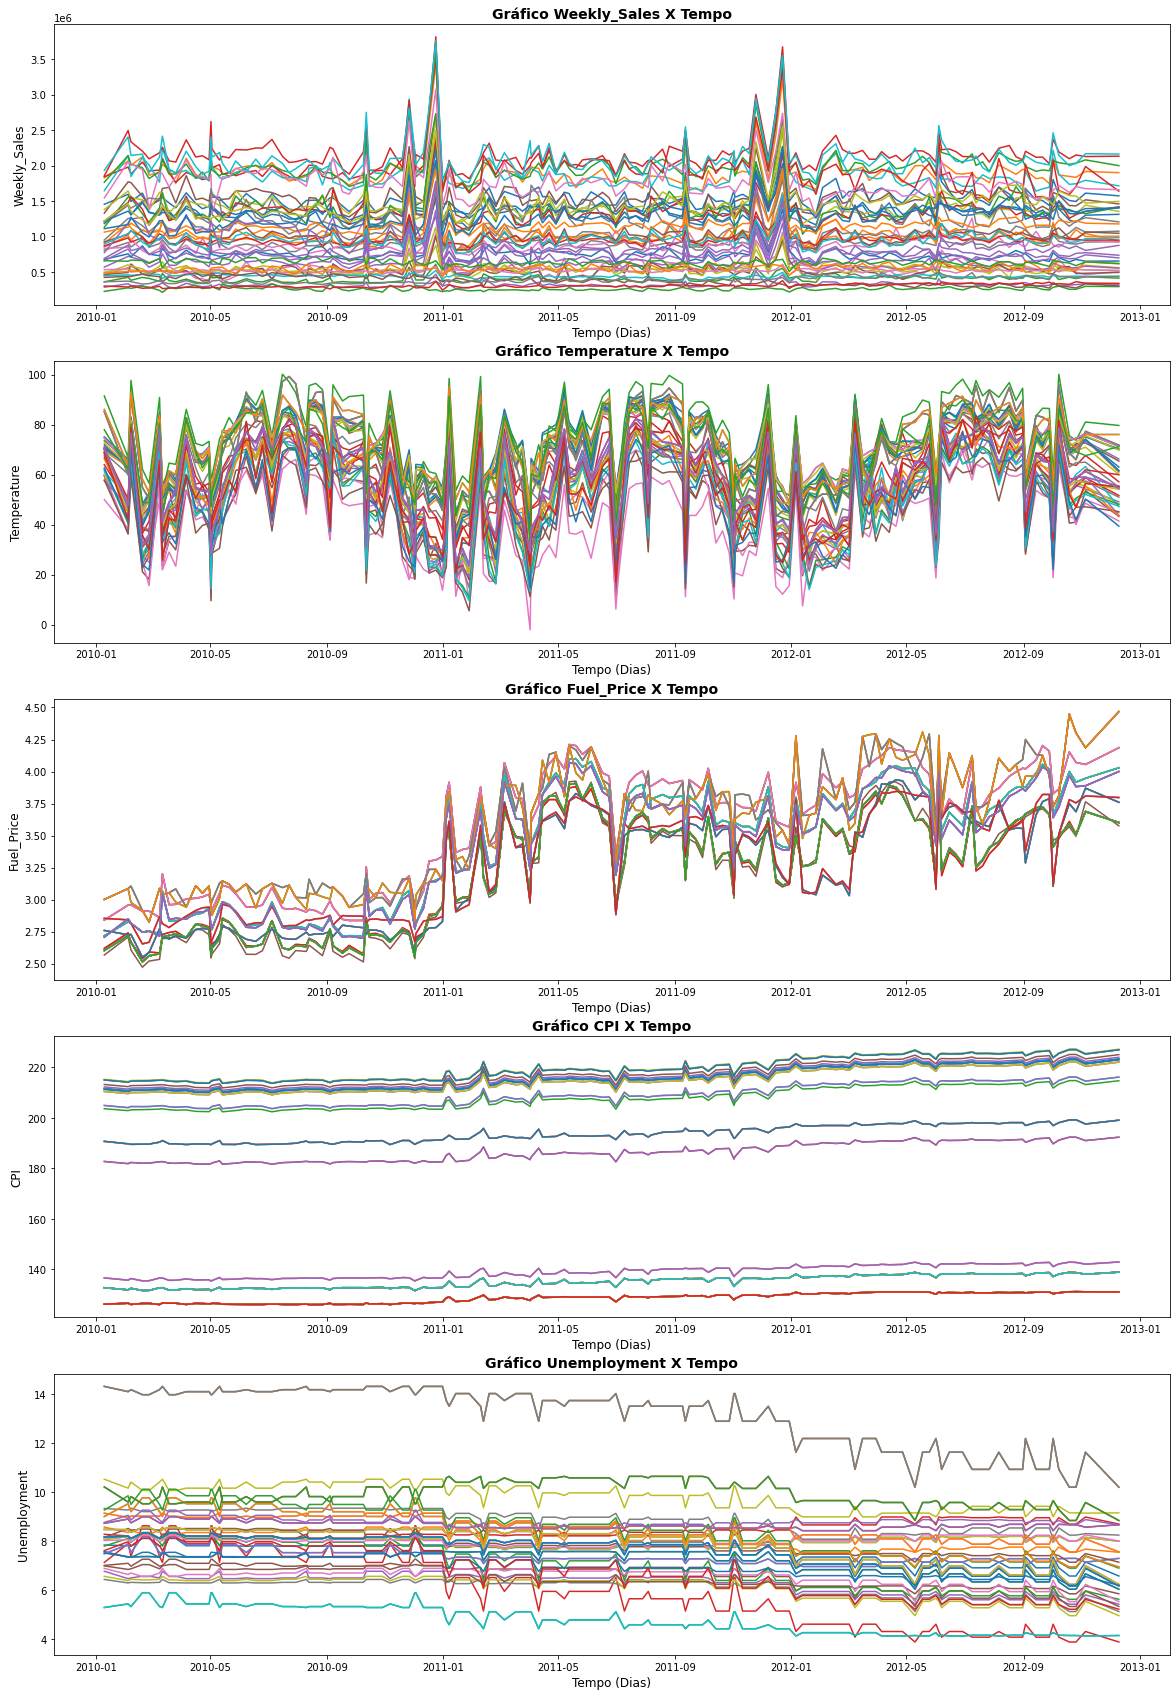

In [9]:
dft = df.copy()
dft.Date = pd.to_datetime(dft.Date)
dft_ordenado = dft.sort_values(by='Date')
l_variaveis = ["Weekly_Sales","Temperature","Fuel_Price","CPI","Unemployment"]
l_subplots = [511,512,513,514,515]
plt.figure(figsize = (20,30))

index = 0
for variavel in l_variaveis:
    plt.subplot(l_subplots[index])
    for loja in range(1,46):
        dados_loja = dft_ordenado.loc[dft['Store'] == loja]
        plt.plot(dados_loja.Date, dados_loja[variavel])
        plt.title(f"Gráfico {variavel} X Tempo", fontsize= 14, fontweight = 600)
        plt.ylabel(variavel, fontsize=12)
        plt.xlabel("Tempo (Dias)", fontsize=12)
    index += 1
plt.show()

___
<div id="Interpretação_Gráficos_Temporais"></div>

`Interpretação Gráficos Temporais`

* Weekly_Sales

O gráfico temporal da Target apresenta relação cíclica dos dados, uma vez que existem grandes quedas nos primeiros meses do ano, e grandes altas ao final do ano. Para saber se essas altas e quedas são causadas por eventos especiais ou feriados, segue gráfico abaixo:

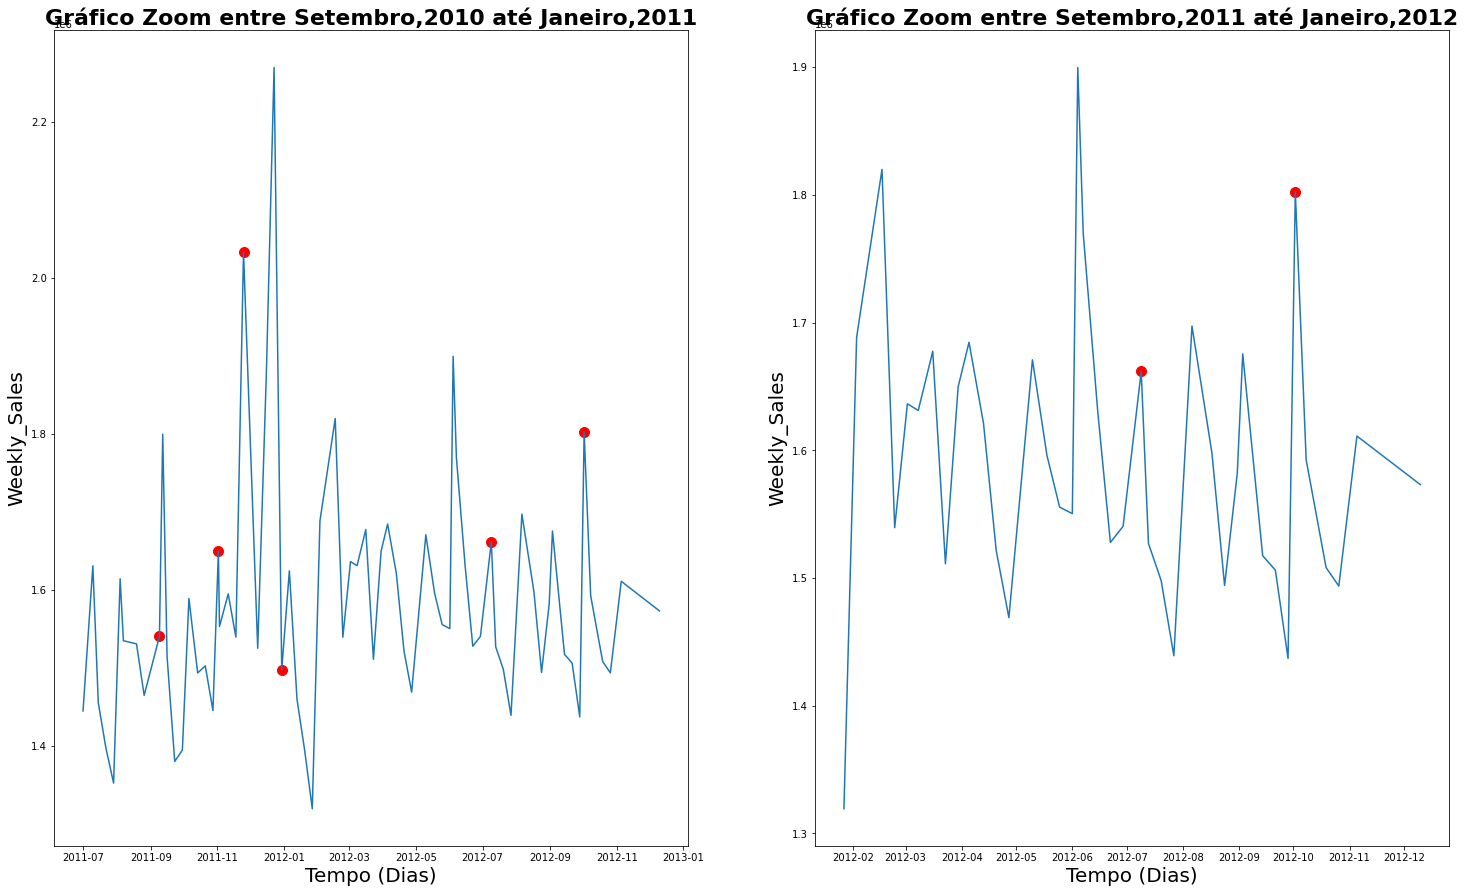

In [10]:
B2, B2T, B, BT, Data_2010, Data_2011, Vendas_2010, Vendas_2011 = dados_grafico_holiday_flag_data(dft)
#Plot Gráfico
plt.figure(figsize=(25,15))
plt.subplot(121)
plt.plot()
plt.scatter(BT, B, c="red",s=100)
plt.plot(Data_2010,Vendas_2010)
plt.xlabel("Tempo (Dias)", fontsize=20)
plt.ylabel("Weekly_Sales", fontsize=20)
plt.title("Gráfico Zoom entre Setembro,2010 até Janeiro,2011", fontsize= 22, fontweight = 600)
plt.subplot(122)
plt.scatter(B2T, B2, c="red",s=100)
plt.plot(Data_2011,Vendas_2011)
plt.xlabel("Tempo (Dias)", fontsize=20)
plt.ylabel("Weekly_Sales", fontsize=20)
plt.title("Gráfico Zoom entre Setembro,2011 até Janeiro,2012", fontsize= 22, fontweight = 600)
plt.show()

Para a facção deste gráfico foi escolhida a primeira loja da lista de lojas, representada pelo ID 1 - esta escolha foi realizada com mérito totalmente explicativo, deixando o gráfico simples, e apresentando a relação que a feature holiday_flag pode ter com o aumento ou decréscimo de vendas semanais. Como é possível observar no caso da loja 1 não é possível conectar a existência de eventos especiais ou feriados com o aumento das vendas ao final dos anos.

* Temperature

Não é possível retirar conclusões diretas do gráfico temporal da feature “Temperature”, uma vez que aparenta apresentar comportamento cíclico, porém com altas e quedas extremamente agudas, e não periódicas.

* Fuel_Price

O gráfico temporal da feature “Fuel_Price” apresenta relação de crescimento conforme o tempo, sendo este crescimento de 62,83% para a loja com Fuel_Price inicial mais baixo e 63,227% para a loja com o preço inicial mais alto. Podendo haver quedas cíclicas, mas que não serão aprofundadas neste trabalho uma vez que essas variâncias não podem ser justificadas por movimento inflacionário.

In [11]:
lojas, porcentagens = variavel_baixa(dft,"Fuel_Price")
print(f"A loja com Fuel_Price inicial mais baixo foi a {lojas[0]} tendo crescimento de {porcentagens[0]-100:.3f}%")
print(f"A loja com Fuel_Price inicial mais alto foi a {lojas[1]} tendo crescimento de {porcentagens[1]-100:.3f}%")
#Loja com Preço Final mais Alto

A loja com Fuel_Price inicial mais baixo foi a 36 tendo crescimento de 59.142%
A loja com Fuel_Price inicial mais alto foi a 10 tendo crescimento de 58.159%


* CPI

O Gráfico temporal da feature “CPI” apresenta relação de crescimento conforme o tempo, sendo o mesmo:

In [12]:
lojas, porcentagens = variavel_baixa(dft,"CPI")
print(f"A loja com CPI inicial mais baixo foi a {lojas[0]} tendo crescimento de {porcentagens[0]-100:.3f}%")
print(f"A loja com CPI inicial mais alto foi a {lojas[1]} tendo crescimento de {porcentagens[1]-100:.3f}%")

A loja com CPI inicial mais baixo foi a 4 tendo crescimento de 4.069%
A loja com CPI inicial mais alto foi a 9 tendo crescimento de 6.260%


* Unemployment

O gráfico temporal da feature “Unemployment” apresenta uma relação de decréscimo conforme o tempo, sendo esta movimentação de % para a loja e % para a loja.

___
<div id="Histograma"></div>

#### Histograma

A fim de aprofundar ainda mais o comportamento da Target e Features, abaixo estão plotados gráficos histogramas:

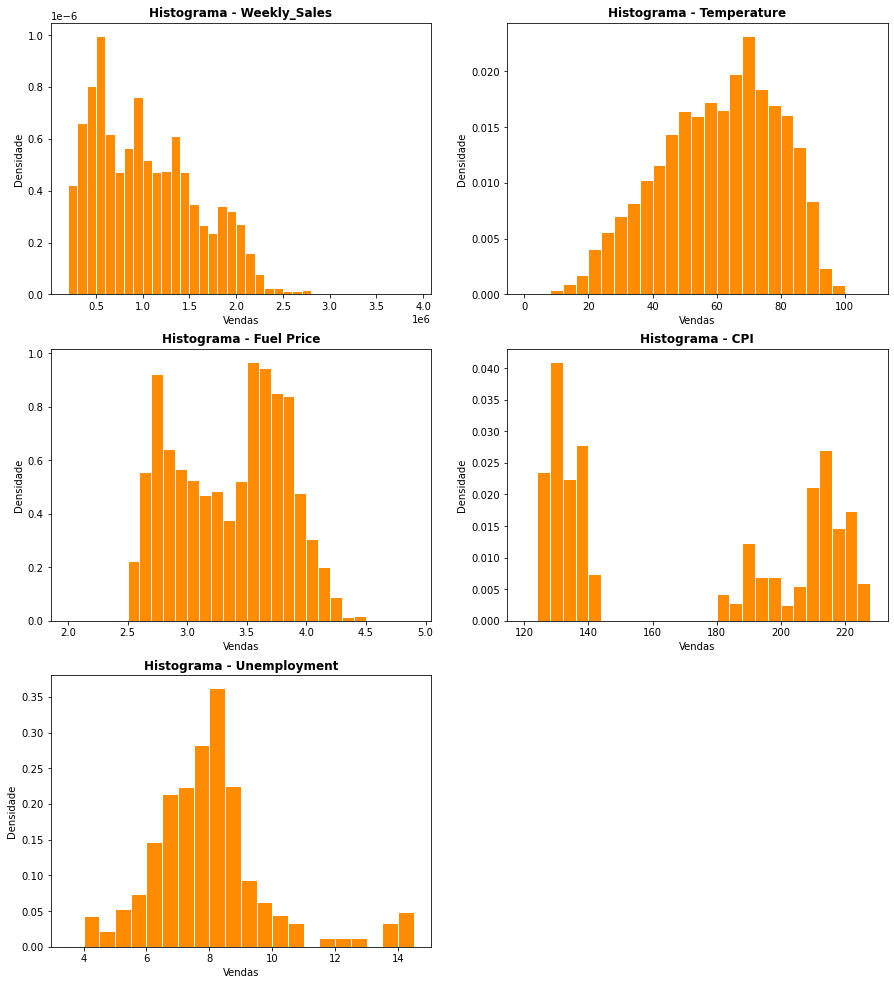

In [13]:
plt.figure(figsize=(15,23))
plt.subplot(421)
faixa = np.arange(2e5,4e6,1e5)
plt.hist(dft["Weekly_Sales"],bins=faixa, density=True, edgecolor='white', color='darkorange')
plt.title('Histograma - Weekly_Sales', fontweight = 600)
plt.ylabel('Densidade')
plt.xlabel('Vendas')

plt.subplot(422)
faixa = np.arange(0,110,4)
plt.hist(dft["Temperature"],bins=faixa, density=True, edgecolor='white', color='darkorange')
plt.title('Histograma - Temperature', fontweight = 600)
plt.ylabel('Densidade')
plt.xlabel('Vendas')

plt.subplot(423)
faixa = np.arange(2,5,0.1)
plt.hist(dft["Fuel_Price"],bins=faixa, density=True, edgecolor='white', color='darkorange')
plt.title('Histograma - Fuel Price', fontweight = 600)
plt.ylabel('Densidade')
plt.xlabel('Vendas')

plt.subplot(424)
faixa = np.arange(120,230,4)
plt.hist(dft["CPI"],bins=faixa, density=True, edgecolor='white', color='darkorange')
plt.title('Histograma - CPI', fontweight = 600)
plt.ylabel('Densidade')
plt.xlabel('Vendas')

plt.subplot(425)
faixa = np.arange(3.5,15,0.5)
plt.hist(dft["Unemployment"],bins=faixa, density=True, edgecolor='white', color='darkorange')
plt.title('Histograma - Unemployment', fontweight = 600)
plt.ylabel('Densidade')
plt.xlabel('Vendas')

plt.show()

A partir dos histogramas, é possível observar que:
- Weekly Sales têm assimetria à direita;
- Temperature têm assimetria à esquerda;
- Fuel Price têm simetria;
- CPI inconclusivo;
- Unemployment têm simetria.

___
<div id="Gráfics_de_Correlação"></div>

`Gráficos de Correlação`

Vamos plotar o gráfico de correlação de cada feature por loja, tendo em azul a feature Temperatura, em amarelo a feature Fuel_price, em vermelho a feature CPI e em roxo a feature Unemployment. 

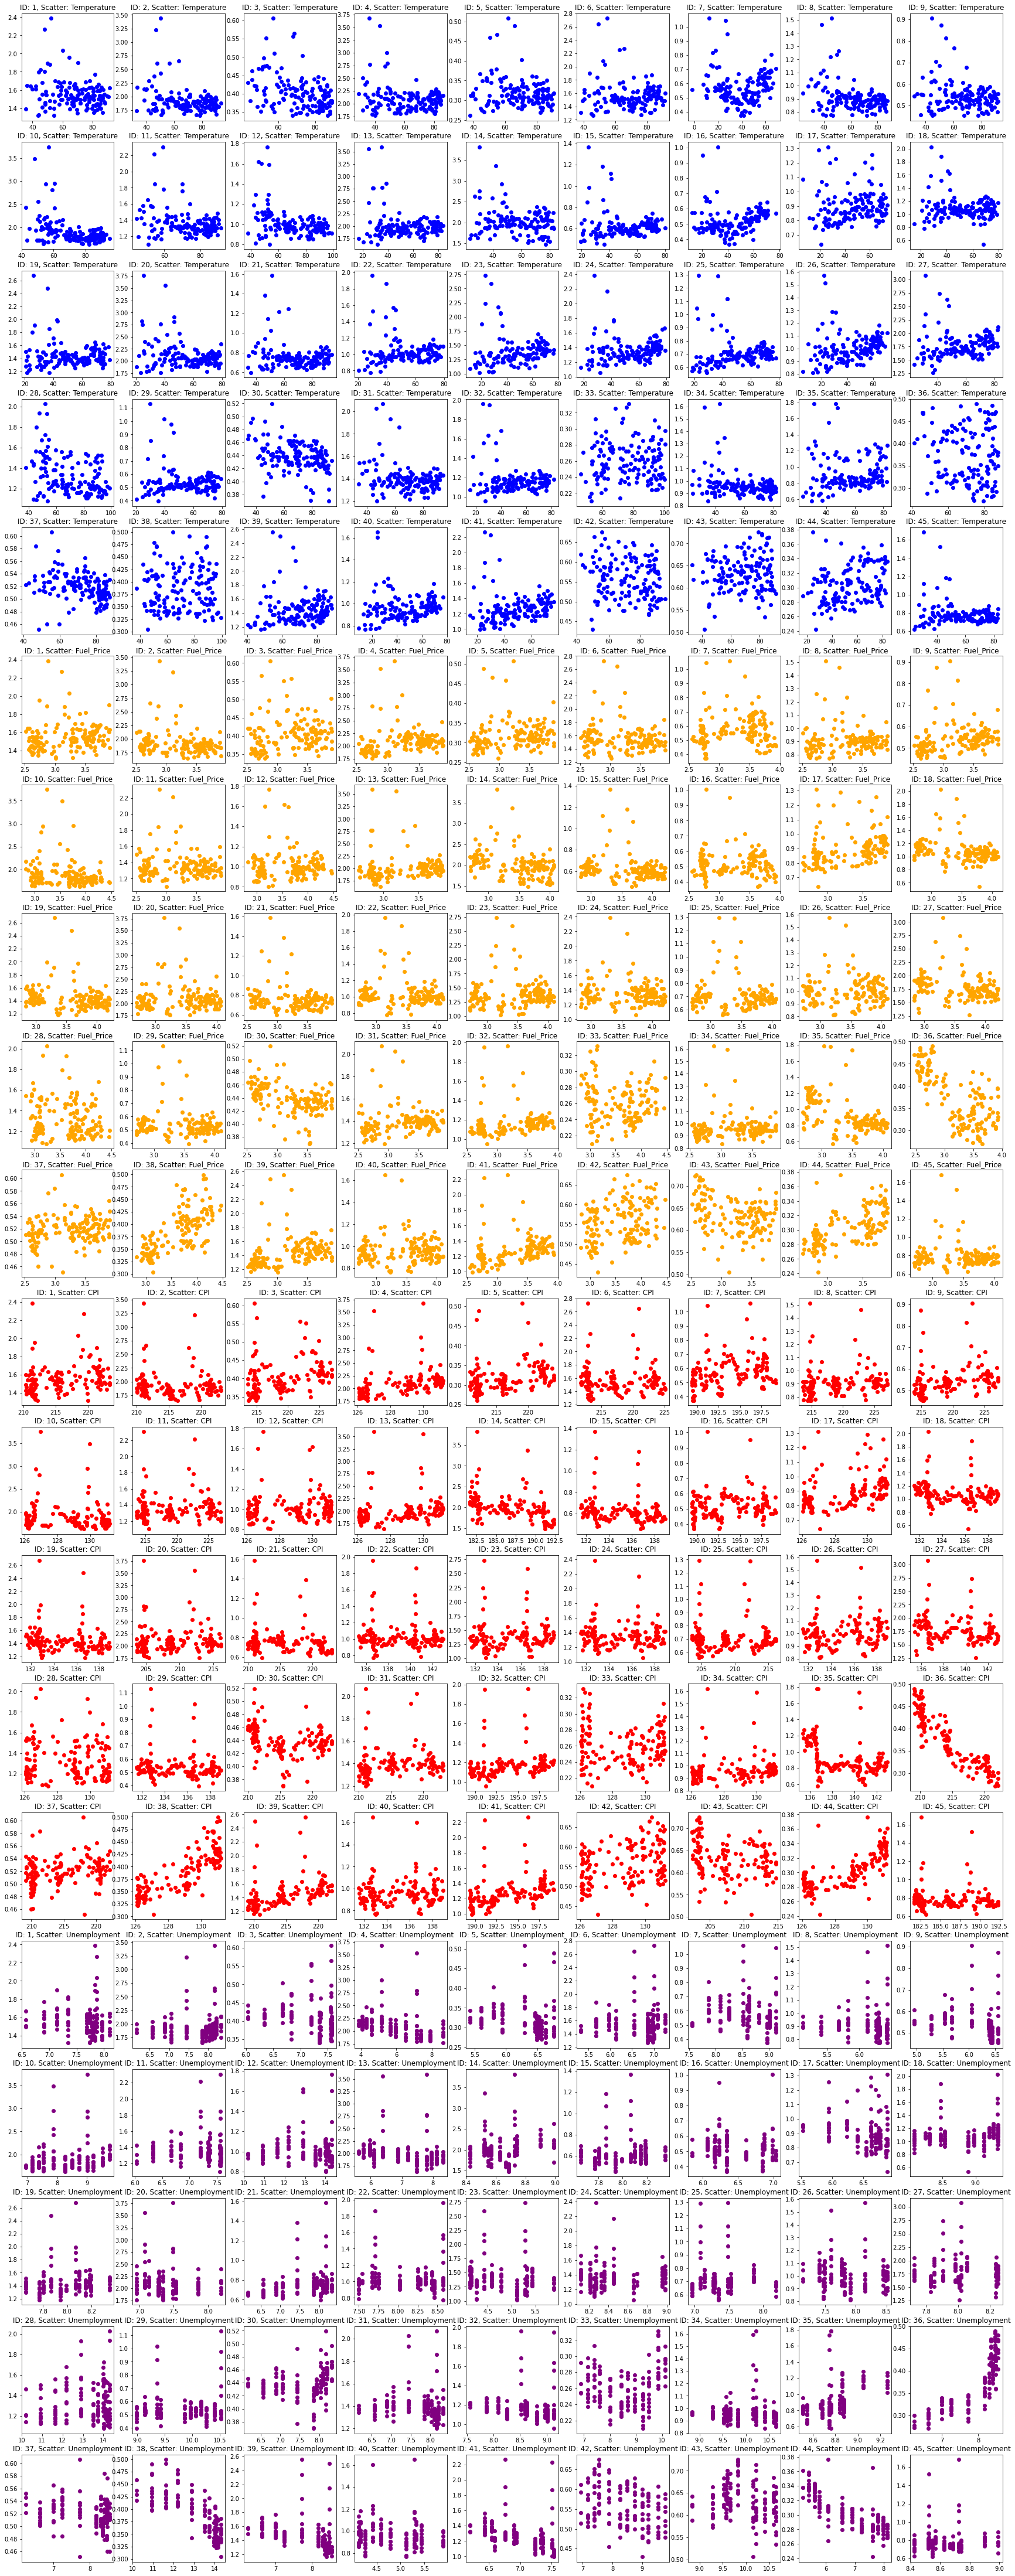

In [47]:
#Plotando Gráfico como Subplots - Definindo fig e axs
#Definindo Figura de Gráfico
fig, axs = plt.subplots(20,9)
fig.set_figheight(80)
fig.set_figwidth(30)
#Definindo Index de Subplots
index_s = 0
index_p = 0
index_c = 0
#Definindo Indicadores utilizados
indicadores = ["Temperature","Fuel_Price","CPI","Unemployment"]
#Definindo Cores para diferentes Features
color = ["blue","orange","red","purple"]
for indicador in (indicadores):
    for loja in range(1,46):
        #Bloqueia Dados por loja
        Dados = dft.loc[df["Store"]==loja,:]
        #Adiciona gráfico Scatter com Dados de um Indicador e Weekly_Sales em Milhões
        axs[index_p,index_s].scatter(Dados[indicador],Dados["Weekly_Sales"]/1000000, c=color[index_c]) # Weekly_Sales em Milhão
        #Adiciona e Modifíca título
        axs[index_p,index_s].set_title(f"ID: {loja}, Scatter: {indicadores[index_c]}")
        if index_s == 8:
            index_s = 0
            index_p +=1
        else:
            index_s +=1
    index_c += 1
plt.show()

A partir destes gráficos é perceptível a variação do comportamento de cada Feature por diferentes lojas. A seguir haverá um aprofundamento destes gráficos.

<div id="DataFrame_de_Correlações"></div>

`DataFrame de Correlações`

Como foi supracitado, o objetivo da criação desta Frame é aprofundar as correlações das features com a target, a fim de distinguir através de grupos as relações que cada uma das features de cada loja tem com suas vendas semanais.

Acima estão lotados 180 gráficos de dispersão, que apresentam o comportamento de cada variável pela Target, entre eles são:
- 45 Gráficos da Target pela Feature: Weekly_Sales
- 45 Gráficos da Target pela Feature: Fuel_Price
- 45 Gráficos da Target pela Feature: CPI
- 45 Gráficos da Target pela Feature: Unemployment

Para aprofundar cada gráfico foi criado um DataFrame com a correlação de cada uma dessas variáveis - havendo também a divisão delas em três grupos de correlação:

* Grupo 1 = Correlação Media/Forte Positiva
* Grupo 0 = Correlação Fraca (Seja Negativa/Positiva)
* Grupo -1 = Correlação Media/Forte Negativa

In [15]:
dft.Date = pd.to_datetime(dft.Date)
dfo = dft.sort_values(by="Date")
#Definindo Indicadores - Para Realizar Corr
indicadores = ["Temperature","Fuel_Price","CPI","Unemployment"]
target = "Weekly_Sales"
store = "Store"
#Criando DataFrame de Correlação das Features com Target
Correlation = correlacao(dfo,indicadores, target, store)
for indicador in indicadores:
    Correlation['Corr_' + indicador] = Correlation[indicador].apply(grupo)
#Checando DataFrame para Temperature
Correlation.head(5)

Temperature  Fuel_Price       CPI  Unemployment  Corr_Temperature  \
1    -0.222701    0.124592  0.225408     -0.097955                 0   
2    -0.297673   -0.196375 -0.062431      0.066325                 0   
3    -0.377524    0.140886  0.317250     -0.230413                -1   
4    -0.225583    0.211549  0.351157     -0.337015                 0   
5    -0.175517    0.167352  0.308261     -0.207043                 0   

   Corr_Fuel_Price  Corr_CPI  Corr_Unemployment  
1                0         0                  0  
2                0         0                  0  
3                0         1                  0  
4                0         1                 -1  
5                0         1                  0

* Temperature

A média encontrada é de 0,133 que representa uma correlação positiva fraca. Porém, ao analisar o DataFrame de forma individual é possível averiguar que:

    - 7 Lojas pertencem ao Grupo: -1
    - 38 Lojas pertencem ao Grupo: 0
    - 0 Lojas pertencem ao Grupo: 1

O que indica que com o crescimento da temperatura externa das lojas as vendas semanais tendem a cair - havendo uma relação de proporcionalidade inversa

* Fuel_Price

A média encontrada é de -0,108 que representa uma correlação negativa fraca. Porém, ao analisar o DataFrame de forma individual é possível averiguar que:

    - 5 Lojas pertencem ao Grupo: -1
    - 35 Lojas pertencem ao Grupo: 0
    - 5 Lojas pertencem ao Grupo: 1

Mostrando que a variável tem relação media/forte em 10 lojas, porém não cria a mesma intensidade com o restante das lojas. Sendo assim não é possível afirmar que a Feature Fuel_Price influencia diretamente nas vendas semanais das lojas do Walmart.

* CPI


A média encontrada é de 0,133 que representa uma correlação positiva fraca. Porém, ao analisar o DataFrame de forma individual é possível averiguar que:

    - 3 Lojas pertencem ao Grupo: -1
    - 33 Lojas pertencem ao Grupo: 0
    - 9 Lojas pertencem ao Grupo: 1

O que indica que a grande maioria das lojas não demonstram grande correlação entre a Feature e Target, porém 9 lojas apresentam um aumento nas vendas - algo contraintuitivo, uma vez que, de acordo com a BBC UK, o crescimento da variável CPI (Consumer price index), índice utilizado para medir como a inflação impacta o consumidor final, causa redução no valor da moeda reduzindo o poder de compra.


* Unemployment

A média encontrada é de -0,088 que representa uma correlação negativa fraca. Porém, ao analisar o DataFrame de forma individual é possível averiguar que:

    - 6 Lojas pertencem ao Grupo: -1
    - 37 Lojas pertencem ao Grupo: 0
    - 2 Lojas pertencem ao Grupo: 1

O que indicia que a grande maioria das lojas não demonstram grande correlação entre a Feature e Target, porém 6 lojas indicam que o aumento na taxa de desemprego local causa quedas nas vendas.

<div id="Comportamento_perante_distribuição"></div>

#### Comportamento perante distribuição

A fim de concluir a seção de análise exploratória, abaixo estão plotados ProbPlots, que têm o objetivo de identificar qual distribuição de probabilidade a variável Target melhor se adere.

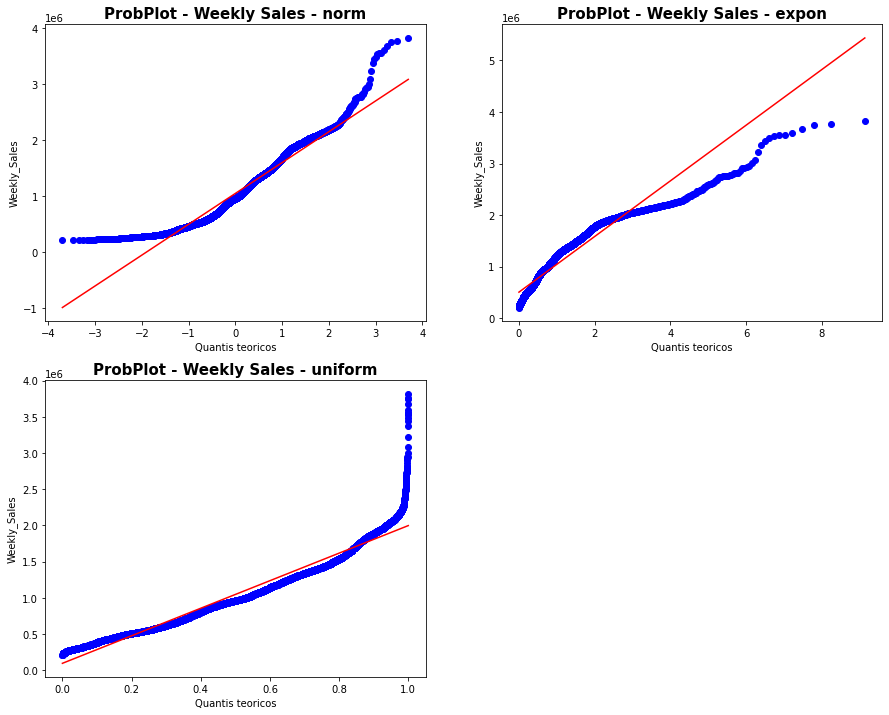

In [16]:
#Definindo Figura dos Gráficos
plt.figure(figsize=(15,12))
#1° ProbPlot - Weekly_Sales - Norm
plt.subplot(221)
probplot(dft["Weekly_Sales"], dist= "norm", plot=plt);
plt.title("ProbPlot - Weekly Sales - norm", fontsize=15,fontweight=600)
plt.ylabel("Weekly_Sales")
plt.xlabel("Quantis teoricos")
#2° ProbPlot - Weekly_Sales - Expon
plt.subplot(222)
probplot(dft["Weekly_Sales"], dist= "expon", plot=plt);
plt.title("ProbPlot - Weekly Sales - expon", fontsize=15,fontweight=600)
plt.ylabel("Weekly_Sales")
plt.xlabel("Quantis teoricos")
#3° ProbPlot - Weekly_Sales - Uniform
plt.subplot(223)
probplot(dft["Weekly_Sales"], dist= "uniform", plot=plt);
plt.title("ProbPlot - Weekly Sales - uniform", fontsize=15,fontweight=600)
plt.ylabel("Weekly_Sales")
plt.xlabel("Quantis teoricos")

plt.show()

A partir dos Probplots é possível afirmar que as vendas semanais do Walmart se aproximam de uma distribuição uniforme, porém não aderem de forma completa nenhuma das três distribuições supra apresentadas - algo que pode se dar pelos dados não serem sintéticos, havendo outras variáveis externas ao dataset que possam influenciar no comportamento das features e target.

Deste modo, com intuito de atenuar este comportamento na próxima seção analisaremos cada loja de maneira individual, realizando a média simples das vendas semanais por cada loja, de tal modo que foi analisada a mesma semana nos diferentes anos do Database, isto é, a semana 1 do ano 2010, com a semana 1 do ano 2011, com a semana 1 do ano 2012, podendo deste modo inferir o comportamento semanal de cada loja ao longo do ano.

____

<div id="Construção_da_Base_de_Dados"></div>

### Construção da Base de Dados

* Preparando Base de Dados

Nesta etapa a base de dados principal terá suas variáveis features e Target divididas em três Dataframes separados por períodos temporais, que, como citado acima, será utilizada para analisar cada loja de maneira individual, através da realização da média simples das vendas semanais, Temperature, Fuel Price, CPI e Unemployment por cada loja em cada semana do ano - Sendo analisado o comportamento desta variável no mesmo período ao longo dos anos.

In [17]:
#==== Dividindo DataFrame em três anos
#Definindo Listas e Variáveis
Date = lista_datas()
Date_ = []
index1 = [0,0,0,0]
index2 = []
index3 = []
for e in range(len(Date)-1):
    if Date[e][-1] == "0":
        index1.append(Date[e])
    elif Date[e][-1] == "1":
        index2.append(Date[e])
    else:
        index3.append(Date[e])
Date_.append(index1)
Date_.append(index2)
Date_.append(index3)
print(f"Data Inicial: {Date_[0][4]}, Data Limite 2010: {Date_[0][-1]}")
print(f"Data Inicial 2011: {Date_[1][0]} Data Limite 2011: {Date_[1][-1]}")
print(f"Data Inicial 2012: {Date_[2][0]} Data Limite 2011: {Date_[2][-1]}")

Data Inicial: 05-02-2010, Data Limite 2010: 31-12-2010
Data Inicial 2011: 07-01-2011 Data Limite 2011: 30-12-2011
Data Inicial 2012: 06-01-2012 Data Limite 2011: 19-10-2012


In [18]:
# Criando Dataframe separados por Periodos

data_2010 = dft.loc[dft["Date"] <= '31/12/2010']
data_2011 = dft.loc[dft["Date"] > '31/12/2010']
data_2011 = data_2011.loc[data_2011['Date'] <= '31/12/2011']
data_2012 = dft.loc[dft["Date"] > '31/12/2011']

In [19]:
#Definindo Listas de Features - 2010
WS_2010 = []
Temp_2010 = []
Fuel_2010 = []
CPI_2010 = []
Unemp_2010 = []
#Definindo Listas de Features - 2012
WS_2012 = []
Temp_2012 = []
Fuel_2012 = []
CPI_2012 = []
Unemp_2012 = []
#==== Corrigindo dados para depois adicioná-los as Listas de Features
for e in range(0,180):
    WS_2010.append(0)
    Temp_2010.append(0)
    Fuel_2010.append(0)
    CPI_2010.append(0)
    Unemp_2010.append(0)
for e in data_2010["Weekly_Sales"]:
    WS_2010.append(e)
for e in data_2010["Temperature"]:
    Temp_2010.append(e)
for e in data_2010["Fuel_Price"]:
    Fuel_2010.append(e)
for e in data_2010["CPI"]:
    CPI_2010.append(e)
for e in data_2010["Unemployment"]:
    Unemp_2010.append(e)
for e in data_2012["Weekly_Sales"]:
    WS_2012.append(e)
for e in data_2012["Temperature"]:
    Temp_2012.append(e)
for e in data_2012["Fuel_Price"]:
    Fuel_2012.append(e)
for e in data_2012["CPI"]:
    CPI_2012.append(e)
for e in data_2012["Unemployment"]:
    Unemp_2012.append(e)
for e in range (0,405):
    WS_2012.append(0)
    Temp_2012.append(0)
    Fuel_2012.append(0)
    CPI_2012.append(0)
    Unemp_2012.append(0)
    
#Criando Novo DataFrame com Dados Coletados
DataT = pd.DataFrame()
DataT["Store ID"] = data_2011["Store"]
DataT["WS 2010"] = WS_2010
DataT["WS 2011"] = data_2011["Weekly_Sales"]
DataT["WS 2012"] = WS_2012
DataT["Temp 2010"] = Temp_2010
DataT["Temp 2011"] = data_2011["Temperature"]
DataT["Temp 2012"] = Temp_2012
DataT["Fuel 2010"] = Fuel_2010
DataT["Fuel 2011"] = data_2011["Fuel_Price"]
DataT["Fuel 2012"] = Fuel_2012
DataT["CPI 2010"] = CPI_2010
DataT["CPI 2011"] = data_2011["CPI"]
DataT["CPI 2012"] = CPI_2012
DataT["Unemp 2010"] = Unemp_2010
DataT["Unemp 2011"] = data_2011["Unemployment"]
DataT["Unemp 2012"] = Unemp_2012

#Definindo Listas Auxiliares
Lista_X = []
Lista_Y = []
Lista_Z = []
Lista_M = []
Lista_N = []
#Index de WS 2010
Lista_Index = DataT["WS 2010"].index
#Cálculando Média das variaveis por ano
for e in Lista_Index:
    if DataT["WS 2010"][e] == 0:
        x = (DataT["WS 2011"][e] + DataT["WS 2012"][e])/2
        y = (DataT["Temp 2011"][e] + DataT["Temp 2012"][e])/2
        z = (DataT["Fuel 2011"][e] + DataT["Fuel 2012"][e])/2
        m = (DataT["CPI 2011"][e] + DataT["CPI 2012"][e])/2
        n = (DataT["Unemp 2011"][e] + DataT["Unemp 2012"][e])/2
    elif DataT["WS 2012"][e] == 0:
        x = (DataT["WS 2010"][e] + DataT["WS 2011"][e])/2
        y = (DataT["Temp 2010"][e] + DataT["Temp 2011"][e])/2
        z = (DataT["Fuel 2010"][e] + DataT["Fuel 2011"][e])/2
        m = (DataT["CPI 2010"][e] + DataT["CPI 2011"][e])/2
        n = (DataT["Unemp 2010"][e] + DataT["Unemp 2011"][e])/2
    else:
        x = (DataT["WS 2010"][e] + DataT["WS 2011"][e] + DataT["WS 2012"][e])/3
        y = (DataT["Temp 2010"][e] + DataT["Temp 2012"][e]) + DataT["Temp 2011"][e]/3
        z = (DataT["Fuel 2010"][e] + DataT["Fuel 2012"][e]) + DataT["Fuel 2011"][e]/3
        m = (DataT["CPI 2010"][e] + DataT["CPI 2012"][e]) + DataT["CPI 2011"][e]/3
        n = (DataT["Unemp 2010"][e] + DataT["Unemp 2012"][e]) + DataT["Unemp 2011"][e]/3
    Lista_X.append(x)
    Lista_Y.append(y)
    Lista_Z.append(z)
    Lista_M.append(m)
    Lista_N.append(n)
    
#Criando DataFrame com Novas Médias
Average = pd.DataFrame()
Average["Store ID"] = data_2011["Store"]
Average["Avr WS"] = Lista_X
Average["Avr Temp"] = Lista_Y
Average["Avr Fuel"] = Lista_Z
Average["Avr CPI"] = Lista_M
Average["Avr Unemp"] = Lista_N
Average.head(5)

Store ID       Avr WS  Avr Temp  Avr Fuel     Avr CPI  Avr Unemp
48         1  1497551.100    48.640    3.0665  215.559500      7.545
49         1  1425307.565    41.965    3.1220  215.674969      7.545
50         1  1360899.630    49.075    3.1420  215.906462      7.545
51         1  1318112.450    49.045    3.1500  216.137955      7.545
52         1  1621484.615    49.410    3.1745  216.369448      7.545

* Agrupando as correlações por grupo

In [20]:
#Novos Indicadores do DataFrame Average
indicadores = ["Avr Temp","Avr Fuel", "Avr CPI", "Avr Unemp"]
target = "Avr WS"
store = "Store ID"
#Aplicando Função de Correlação
Average_Corr = correlacao(Average, indicadores, target, store)
Average_Corr.head(5)

Avr Temp  Avr Fuel   Avr CPI  Avr Unemp
1 -0.385470 -0.150815  0.253445   0.058035
2  0.312047  0.484127 -0.707416   0.346999
3 -0.483220 -0.067440 -0.991568  -0.966945
4 -0.536774 -0.585373 -0.630713  -0.605734
5  0.163041  0.418692  0.203006   0.193056

* Apresentação da Base de Dados

In [21]:
Average

Store ID       Avr WS  Avr Temp  Avr Fuel     Avr CPI  Avr Unemp
48           1  1497551.100    48.640    3.0665  215.559500     7.5450
49           1  1425307.565    41.965    3.1220  215.674969     7.5450
50           1  1360899.630    49.075    3.1420  215.906462     7.5450
51           1  1318112.450    49.045    3.1500  216.137955     7.5450
52           1  1621484.615    49.410    3.1745  216.369448     7.5450
...        ...          ...       ...       ...         ...        ...
6387        45   877472.355    45.560    3.2490  185.585025     8.6235
6388        45   979759.825    38.555    3.2620  185.603211     8.6235
6389        45  1101094.265    35.220    3.2765  185.657833     8.6235
6390        45  1602410.010    36.430    3.2650  185.737283     8.6235
6391        45   774279.915    33.730    3.2840  185.816732     8.6235

[2340 rows x 6 columns]

In [22]:
X = Average[['Avr Temp', 'Avr Fuel', 'Avr CPI', 'Avr Unemp']]
Y = Average['Avr WS']

____
<div id="Aprofundamento_Conceitual"></div>

### Aprofundamento Conceitual

<div id="Scikit-Learn"></div>

#### Scikit-Learn
##### Informações sobre biblioteca

Scikit-Learn ou SkLearn é uma biblioteca criada em 2007 por David Cournapeau disponível nas seguintes linguagens de programação:

    - Python
    - Sython
    - C
    - C++

Com grande enfoque na criação, através do uso de Machine Learning, de modelos classificatórios e regressivos, utilizando mais de 20 técnicas como: Linear Regression, Logistic Regression, Quantile Regression, Polynomial Regression. Empregando ferramentas de observação e análise de dados como Clustering, Dimensionality Reduction, Model Selection e Preprocessing.

Esta biblioteca dispõe de ferramentas simples e eficientes para análise preditiva de dados, é reutilizável em diferentes situações, possui código aberto, sendo acessível a todos e foi construída sobre os pacotes NumPy, SciPy e matplotilib.

A biblioteca possui vários pacotes, dentre eles, temos o NumPy e o Pandas como os principais para a preparação dos dados, e o scikit-learn, ou apenas sklearn, sendo o mais utilizado para efetiva criação de modelos de machine learning.

##### Principais aplicações

* Pré-processamento: 
    
    É a parte mais difícil na implementação de um modelo. Temos o Numpy e o Pandas, muito utilizados normalmente esta é a etapa mais trabalhosa no desenvolvimento de um modelo de machine learning. O NumPy e o Pandas são largamente utilizados nesta etapa, mas, para a alegria de todo desenvolvedor, temos outra opção, a biblioteca sklearn também tem funções para esta finalidade, feitos justamente para implementar modelos de machine learnig.
    

* Classificação:


    Aqui entra a parte do desenvolvimento de modelos, temos uma gama de possibilidades. Podemos classificar grupos, predizer se vou ter determinada doença ou não, dentre outras possibilidades.


* Regressão:


    Aqui entra a predição de modelos contínuos, nos permite prever as vendas de uma empresa (é o que estamos fazendo neste trabalho), nos permite predizer o volume de chuva em um determinado período entre tantas outras possibilidades.


* Clusterização: 


    Desenvolvimento de modelos para detecção automática de grupos com características similares em seus integrantes. Podemos identificar clientes com comportamentos parecidos, grupos de risco de determinada doença, verificar padrões entre moradores de uma cidade, e muitos outros agrupamentos.


* Redução de dimensionalidade: 


    Reduzir o número de variáveis em um problema. Com esta redução podemos diminuir consideravelmente a quantidade de cálculos necessários em um modelo, aumentando a eficiência, com uma perde mínima de assertividade.


* Ajuste de parâmetros: 


    Comparar, validar e escolher parâmetros e modelos, de maneira automatizada. Podemos facilmente comparar diferentes parâmetros no ajuste de um modelo, encontrando assim a melhor configuração para a aplicação em questão.

Para este projeto serão utilizados os modelos regressivos:

    - Linear Regression
    - Decision Tree Regressor
    - Random Forest Regressor

Em conjunto com indicadores qualitativos que apresentam a precisão de cada modelo, taxa de erro médio e predição futura.
<div id="Machine_Learning"></div>

#### Machine Learning

<img src="img/machine_learning.png" width=75%>


Machine Learning é um campo da ciência dos dados que foca no aprendizado automático por parte do computador, havendo, apenas, a necessidade de se optar por um método supervisionado - podendo este ser modelos de regressão ou classificação e a necessidade de se dividir de maneira randômica uma base de dados em treinamento e teste - não existindo um valor exato para a divisão, uma vez que cada modelo terá o seu ponto de equilíbrio (ponto, no qual há maior eficácia do modelo).

Que serão utilizados exclusivamente para a máquina treinar excessivamente (para todos os dados disponíveis) tentando encontrar qual a melhor forma de se solucionar um problema - ou no caso da regressão linear, por exemplo, encontrar a reta que melhor satisfaz a necessidade de correlação entre as Features e a Target.

Uma vez encontrado este modelo será aplicado ao restante da base de dados (Teste), e onde a partir das predições, modelos ou pontos encontrados há a possibilidade de se utilizar indicadores como `mean_squared_error` ou `r2_score` para se averiguar a taxa de acerto do sistema e assim partir para a predição final dos dados.

Essa técnica permite o modelo aprender com os dados antes de ser implementado na prática, a medida que ele treina (aprende) se aperfeiçoa cada vez mais. Contextualizando o quão bom é a técnica, tomemos o seguinte exemplo:
    
    A NASA enviou um satélite ao espaço com o intuito de descobrir exoplanetas para ser a possível nova Terra, nossa nova casa, afinal o Sol está morrendo, temos apenas 5 milhões de anos (pode ficar despreocupado rsrsrs). Nesse satélite, envia uma quantidade gigantesca de dados todos os dias, cerca de 7 terabites de dados diariamente, é muito dado para analisar. Antigamente, usava-se GPU e TPU para o processamento, levando cerca de 33h para confirmar a existência de um exoplaneta. Com o uso da inteligência artificial, treinando o modelo com imagens do que realmente é um exoplaneta, chegou-se a marca de 1min e 30s. Ufaaa, desse jeito vamos analisar cada vez mais dados e poderemos nos mudar de planeta quando precisar.
    
    Situações como essa, descritas acima, são um pequeno exemplo do poder da técnica de machine learing. E neste projeto vamos usar essa técnica maravilhosa para prever as vendas semanais da rede Walmart, agora sim o gerente vai ficar feliz.

<div id="Data_Mining"></div>

#### Data Mining

Data mining ou mineração de dados é um processo pelo qual um computador ou algoritmo extraem, descobrem e analisam dados/padrões em um DataSet, envolvendo Machine Learning, estatística e sistema de base de dados. Sendo um dos pilares fundamentais para modelos de regressão avançados - como os utilizados modelos de Random Fores Regressor e Decision Tree Regressor.
Algumas das tarefas envolvidas em minerar dados é:

- Detecção de Anomalias
- Association Rule Learning
- Clustering
- Classificação
- Regressão
- Sumarização

Sendo todas elas conectadas a forma, pela qual os dados são identificados, conectados, correlacionados, estruturados, preditos, agrupados e apresentados.

Uma exemplificação deste processo está representada na imagem abaixo, na qual cada figura representa:

- Figura 1: Análise e Clusterização
- Figura 2: Generalização
- Figura 3: Classificação
- Figura 4: Dependência

<img src="img/data-mining.png" width=75%>

a primeira figura representa a etapa de análise e Clusterização, a segunda figura a etapa 

<div id="Linear_Regression_Modelo1"></div>

#### Linear Regression - Modelo 1

<img src="img/ilustracao_linear.png" width=75%>

O primeiro modelo utilizado será o de regressão linear que têm objetivo predizer uma variável Target, através da construção de um modelo teste baseado na correlação das variáveis secundarias (Features) com a variável principal Target.

Como foi colocado acima, este modelo faz o uso de Machine Learning para, através dos dados de treinamento, descobrir qual o comportamento de cada Feature pela Target, qual a influência deste comportamento no crescimento ou decréscimo de ambas as variáveis - e como, com visão macro, este comportamento pode ser previsto através da realização de um modelo. 

Para isso é utilizado um método de Hipótese chamado de Sistema de Hipóteses da Regressão Linear, representado pela função abaixo:

<center>$Y = Θ_{1} + Θ_{2}*X$</center>

Neste sistema de hipótese a máquina irá testar individualmente qual a reta que melhor se encaixa no comportamento das Features pela Target, resultando na geração de uma regressão linear ou reta linear simples, que dará a possibilidade de predizer dados futuros através de todos os comportamentos analisados.

A imagem colocada no início desta seção representa o trabalho de um algoritmo em encontrar qual a melhor reta perante diversos pontos dispersos no gráfico.

Como todos os modelos, este tem benefícios aparentes, por ser um modelo extremamente simples, uma vez que trata todas as variáveis de forma linear. Porém existe um grande Upside, uma vez que, teoricamente, não é um modelo totalmente preciso quando comparado a outros de maior complexidade.

<div id="Decision_Tree_Regressor_Modelo2"></div>

#### Decision Tree Regressor - Modelo 2

O segundo método utilizado é o Decision Tree Regressor, um método extremamente comum para predições comportamentais (qualitativas) e quantitativas, funcionando a partir da criação de uma arvore de variáveis.

A arvore têm início com uma semente chamada de Root Node que contém todas as Features e Target do Dataset. Essa Node inicial vai ser dividida em Nodes individuais que contém todas as Features separadas da Target - esta Node é chamada de Interior Node, e pode ser dividida mais vezes em Leaf Nodes.

Leaf Nodes por sua vez são Nodes de consequência ou Outcome que podem representar, por exemplo, um valor booleano, ou no caso deste projeto representa se a Weekly_Sales irá subir ou descer baseado nas features que estão no Interior Node.

<img src="img/ilustracao_dados_treeregression.png" width=110%>

A imagem acima apresenta um exemplo de como esta separação por nodes funciona. E a imagem abaixo, apresenta como este modelo analisa dados de forma gráfico - algo que não será aprofundado neste projeto.

<img src="img/ilustracao_grafico_treeregression.png" width=75%>

Igual ao modelo de regressão linear, o modelo de decisão em arvore têm que ser treinando para conseguir se adaptar ao Dataset colocado e as suas condições únicas - para assim saber como a variância das features pode alterar o Outcome da Target.

Alguns benefícios do modelo:

* Simples de entender e interpretar, as árvores podem ser visualizadas.
* Requer pouca preparação de dados. Outras técnicas muitas vezes requerem normalização de dados, variáveis fictícias precisam ser criadas e valores em branco para serem removidos. Observe, no entanto, que este módulo não suporta valores ausentes.
* O custo do uso da árvore (ou seja, dados de previsão) é logarítmico no número de pontos de dados usados para treinar a árvore.
* Capaz de lidar com dados numéricos e categóricos. No entanto, a implementação do scikit-learn não suporta variáveis categóricas por enquanto. Outras técnicas são geralmente especializadas na análise de conjuntos de dados que possuem apenas um tipo de variável.
* Capaz de lidar com problemas de várias saídas.
* Usa um modelo de caixa branca. Se uma determinada situação é observável em um modelo, a explicação para a condição é facilmente explicada pela lógica booleana. Por outro lado, em um modelo de caixa preta (por exemplo, em uma rede neural artificial), os resultados podem ser mais difíceis de interpretar.
* Possível validar um modelo usando testes estatísticos. Isso possibilita a confiabilidade do modelo.
* Apresenta um bom desempenho, mesmo que suas suposições sejam violadas de alguma forma pelo modelo verdadeiro a partir do qual os dados foram gerados.

As desvantagens do modelo incluem:

* Os aprendizes de árvores de decisão podem criar árvores supercomplexas que não generalizam bem os dados. Isso é chamado de overfitting problem. Mecanismos como poda, definir o número mínimo de amostras necessárias em um nó folha ou definir a profundidade máxima da árvore são necessários para evitar este problema.
* As árvores de decisão podem ser instáveis porque pequenas variações nos dados podem resultar na gerada por uma árvore completamente diferente. Este problema é mitigado pelo uso de árvores de decisão dentro de um conjunto.
* As previsões de árvores de decisão não são suaves nem contínuas, mas as aproximações constantes, como visto na figura acima. Portanto, eles não são bons em extrapolação.
* O problema de aprender uma árvore de decisão ideal é conhecido por ser NP-completo sob vários aspectos da idealidade e até mesmo para conceitos simples. Consequentemente, algoritmos de aprendizagem de árvore de decisão práticos são baseados em algoritmos heurísticos, como o algoritmo guloso, em que decisões localmente ótimas são feitas em cada nó. Tais algoritmos não podem garantir o retorno da árvore de decisão globalmente ideal. Isso pode ser mitigado treinando várias árvores em um aprendiz de conjunto, onde as características e amostras são amostradas aleatoriamente com substituição.
* Existem conceitos que são difíceis de aprender porque as árvores de decisão não as expressam facilmente, como XOR, paridade ou problemas multiplexer. Os aprendizes de árvores de decisão criam árvores tendenciosas se algumas classes dominam. Recomenda-se, portanto, equilibrar o conjunto de dados antes de se encaixar com a árvore de decisão.

<div id="Random_Forest_Regressor_Modelo_3"></div>

#### Random Forest Regressor - Modelo 3

<img src="img/randomfores.png" width=75%>

Random Forest Regression é um algoritmo que faz o uso de diversos algoritmos de Machine Learning e Data mining para fazer uma predição com maior exatidão. Esse modelo é muito conhecido por ter uma estrutura de dados em formato de arvore, uma vez que ele constrói de forma totalmente randômica uma serie de arvores que fazem a análise dos dados recebidos, correlações entre eles, e dão um output que é uma predição - importante citar que as arvores não têm conexões entre si, funcionando de forma totalmente independente e autônoma, a única informação que todas as arvores compartilham é a Sample inicial.
Após todas as arvores realizarem sua predição o algoritmo irá realizar a média e dará um output com uma arvore de predições.

O grande diferencial deste modelo é que ele é extremamente complexo, poderoso e de alta de acerto, sendo utilizado em problemas com relações não lineares. As desvantagens também são grandiosas, uma vez que é um modelo de grande complexidade estrutural não é fácil operar as variáveis e não existe interpretação de resultados independentes.

<div id="Validação_cruzada"></div>

#### Validação cruzada

Aprender os parâmetros de uma função de predição e testá-la com os mesmos dados é um erro metodológico: um modelo que apenas repetisse os rótulos das amostras que acabou de ver teria uma pontuação perfeita, mas não conseguiria prever nada útil nos dados ainda não vistos. Essa situação é chamada de overfitting. Para evitá-lo, é prática comum, ao realizar um experimento de aprendizado de máquina (supervisionado), armazenar parte dos dados disponíveis como um conjunto de testes X_test, y_test. Observe que a palavra “experimento” não tem a intenção de denotar apenas uso acadêmico, porque mesmo em ambientes comerciais, o aprendizado de máquina geralmente começa experimentalmente. Aqui está um fluxograma do fluxo de trabalho de validação cruzada típico no treinamento do modelo. Os melhores parâmetros podem ser determinados por técnicas de pesquisa em grade.


<img src="img/grid_search_workflow.png" width=75%>


Ao avaliar diferentes configurações ("hiperparâmetros") para estimadores, como a configuração C que deve ser definida manualmente para um SVM, ainda há o risco de overfitting no conjunto de teste porque os parâmetros podem ser ajustados até que o estimador tenha um desempenho ideal. Dessa forma, o conhecimento sobre o conjunto de teste pode “vazar” para o modelo e as métricas de avaliação não relatam mais o desempenho de generalização. Para resolver este problema, outra parte do conjunto de dados pode ser realizada como um chamado "conjunto de validação": o treinamento continua no conjunto de treinamento, após o que a avaliação é feita no conjunto de validação, e quando o experimento parece ser bem sucedido, a avaliação final pode ser feita no conjunto de teste.

No entanto, ao particionar os dados disponíveis em três conjuntos, reduzimos drasticamente o número de amostras que podem ser usadas para aprender o modelo, e os resultados podem depender de uma escolha aleatória particular para o par de (treinar, validação) conjuntos.

Uma solução para este problema é um procedimento denominado validação cruzada (abreviatura de CV). Um conjunto de teste ainda deve ser apresentado para avaliação final, mas o conjunto de validação não é mais necessário ao fazer o CV. Na abordagem básica, chamada k-fold CV, o conjunto de treinamento é dividido em k conjuntos menores (outras abordagens são descritas abaixo, mas geralmente seguem os mesmos princípios). O seguinte procedimento é seguido para cada uma das k "dobras":

* Um modelo é treinado usando k - 1 dobras como dado de treinamento


* o modelo resultante é validado na parte restante dos dados (ou seja, é usado como um conjunto de teste para calcular uma medida de desempenho, como precisão).

A medida de desempenho relatada pela validação cruzada k-fold é, então, a média dos valores calculados no loop. Essa abordagem pode ser computacionalmente cara, mas não desperdiça muitos dados (como é o caso ao corrigir um conjunto de validação arbitrário), o que é uma grande vantagem em problemas como inferência inversa, onde o número de amostras é muito pequeno.

<img src="img/grid_search_cross_validation.png" width=75%>

<div id="Explained_variance_score"></div>

#### Explained variance score

O explained_variance_score calcula o escore de regressão de variância explicado.
Mais detalhes no link: 

https://en.wikipedia.org/wiki/Explained_variation

Se y' é a saída estimada do target, o correspondente (correto) saída do target, e Var é a variância, o quadrado do desvio padrão, então a variância explicada é estimada da seguinte forma:

<center>$explainedvariance(y',y) = 1 - Var(y-y')/Var(y)$</center>

O melhor valor possível é 1, isso quer dizer que temos outra forma de analisar os dados, de maneira mais direta, sendo que quanto mais próximo 1, melhor é o nosso modelo. Pode ser que venha a ter valores negativos, nesses casos se deve ao fato do modelo ser muito ruim para a análise feita.



____
<div id="Construção_do_Modelo"></div>

### Construção do Modelo

* Dados de Treinamento e Teste

A partir do dataframe separado por semana e loja, vamos separar a base de dados para treinamento e teste, sendo usado o mesmo para a implementação dos 3 modelos. 

In [23]:
X = Average[['Avr Temp', 'Avr Fuel', 'Avr CPI', 'Avr Unemp']]
Y = Average['Avr WS']

# vetores que receberam as informações separadas por lojas
Xi = []
Yi = []
# percorrendo loja a loja, temos:
# vamos utilizar a base de teste com um size de 18%
for loja in range(1,46):
    dff = Average.loc[Average['Store ID'] == loja, :]
    x = dff[['Avr Temp','Avr Fuel','Avr CPI','Avr Unemp']]
    y = dff['Avr WS']
    X_train,X_test,y_train,y_test=train_test_split(x,y, random_state=42,test_size=0.18)
    Xi.append([X_train,X_test])
    Yi.append([y_train,y_test])

____
<div id="Regressão_Linear"></div>

### Regressão Linear - Modelo 1
Para a construção deste modelo não há a necessidade de separar a base de dados em Treinamento e teste, uma vez que essa ação já foi realizada na seção `Construção do Modelo`.
Havendo apenas a necessidade de chamar os dados representados por:

- <b>Xi[loja][0]</b> = X de treinamento para uma dada loja;
- <b>Xi[loja][1]</b> = X de teste para uma dada loja;
- <b>Yi[loja][0]</b> = Y de treinamento para uma dada loja;
- <b>Yi[loja][1]</b> = Y de teste para uma dada loja.

onde "loja" é o ID loja-1, deste modo, variando de 0 a 44.

In [24]:
#==== Banco de Variaveis e Resultados ====
#Tipos de Score
maior_score_test = 0
melhor_id_loja   = 0
pior_score_test  = 1 # pq esse é maior dado, dai sera menor que todos os dados analizamos
pior_id_loja     = 0
lojas_alpha_maior_90 = []
explained_variance_m1 = []
#Informações Unitarias (Cada Store ID)
Mean_Squared = []
R_Squared = []
mean_max_abs_error_m1 = []
#Predição
Y_Prediction = []
Y_Train = []
Importance_m3 = []

# vetor para guardar as informações do cross validation e plotagem de gráficos futura
# vetores com final m guardam a média dos valores
r2_cross_m = []
mean_square_cross_m = []
explained_var_cross_m = []
mean_max_error_m = []
# já os vetores com std no final, guardam o desvio padrão da amostra
r2_cross_std = []
mean_square_cross_std = []
explained_var_cross_std = []
mean_max_error_std = []

for loja in range(0,45): 
    #==== Criando Variaveis e Objetos ====
    regr = linear_model.LinearRegression()
    
    #=== Treinamento do Modelo ====
    # Treinamento Modelo - Usando X_Train e Y_Train
    regr.fit(Xi[loja][0], Yi[loja][0])
    # Predição de Y - Usando X_Test
    sales_y_pred = regr.predict(Xi[loja][1])
    Y_Prediction.append(sales_y_pred)

    #Create linear regression object
    score_train = regr.score(Xi[loja][0], Yi[loja][0])
    score_test = regr.score(Xi[loja][1], Yi[loja][1])
    
    #==== Coletando Informações Sobre Modelo ====
    #Coletando diferentes tipos de Score:
    if score_test > maior_score_test:
        maior_score_test = score_test
        melhor_id_loja = loja + 1 #Adição é realizada por materia de Index e Apresentação
    if score_test < pior_score_test:
        pior_score_test = score_test
        pior_id_loja = loja + 1 #Adição é realizada por materia de Index e Apresentação
    if score_test >= 0.9:
        lojas_alpha_maior_90.append(loja+1)
    
    #Média Quadratica
    m = mean_squared_error(Yi[loja][1], sales_y_pred)
    Mean_Squared.append(m)
    #R Quadrado
    r = r2_score(Yi[loja][1], sales_y_pred)
    R_Squared.append(r)
    # score da variancia, usando o modulo explained_variance_score
    explained_variance_m1.append(explained_variance_score(Yi[loja][1],sales_y_pred)) 
    # mean_absolute_error
    mean_max_abs_error_m1.append(mean_absolute_error(Yi[loja][1],sales_y_pred))
    
    # preparando as features para a validação cruzada
    # precisamos separar as colunas da loja especificada, para a biblioteca trabalhar em cima da loja e feature correta
    # Como Xteste e Xtreinamento já é a feature que eu preciso, basta concatenar a passar esse valar para a crossvalid
    x = pd.concat([Xi[loja][0],Xi[loja][1]],ignore_index = True)
    y = pd.concat([Yi[loja][0],Yi[loja][1]],ignore_index = True)
    
    # na validação cruzada o argumento cv é o número de partições que faremos
    # como temos 52 dados, e 52 = 2²*13, vamos dividir em 13 grupos de 4 amostras
    
    # metricas para a validaçao cruzada
    #'r2','neg_mean_squared_error','explained_variance'
    # as metricas possuem um mnemonico correto, segue o link onde encontrar o mnemonico correto
    # https://scikit-learn.org/stable/modules/model_evaluation.html
    # para r²
    r2 = cross_val_score(regr,x,y, scoring = 'r2', cv = 4)
    r2_cross_m.append(r2.mean())
    r2_cross_std.append(r2.std())
    # erro médio quadratico
    media = cross_val_score(regr,x,y, scoring = 'neg_mean_squared_error', cv = 4)
    mean_square_cross_m.append(media.mean())
    mean_square_cross_std.append(media.std())
    # explanaid variance
    var_exp = cross_val_score(regr,x,y, scoring = 'explained_variance', cv = 4)
    explained_var_cross_m.append(var_exp.mean())
    explained_var_cross_std.append(var_exp.std())
    # mean_absolute_error
    mean_max_error = cross_val_score(regr,x,y, scoring = 'neg_mean_absolute_error', cv = 4)
    mean_max_error_m.append(mean_max_error.mean())
    mean_max_error_std.append(mean_max_error.std())
    
print(f'A loja com o maior score de test foi {melhor_id_loja}, cujo score foi de {maior_score_test}')
print(f'A loja com o pior score de test foi {pior_id_loja}, cujo score foi de {pior_score_test}')
print(f'As lojas cujo score foi maior ou igual a 90% foram: {lojas_alpha_maior_90}')

A loja com o maior score de test foi 3, cujo score foi de 0.9928805898614836
A loja com o pior score de test foi 29, cujo score foi de -0.8385025740321459
As lojas cujo score foi maior ou igual a 90% foram: [3, 28, 30, 36, 37, 38, 42]


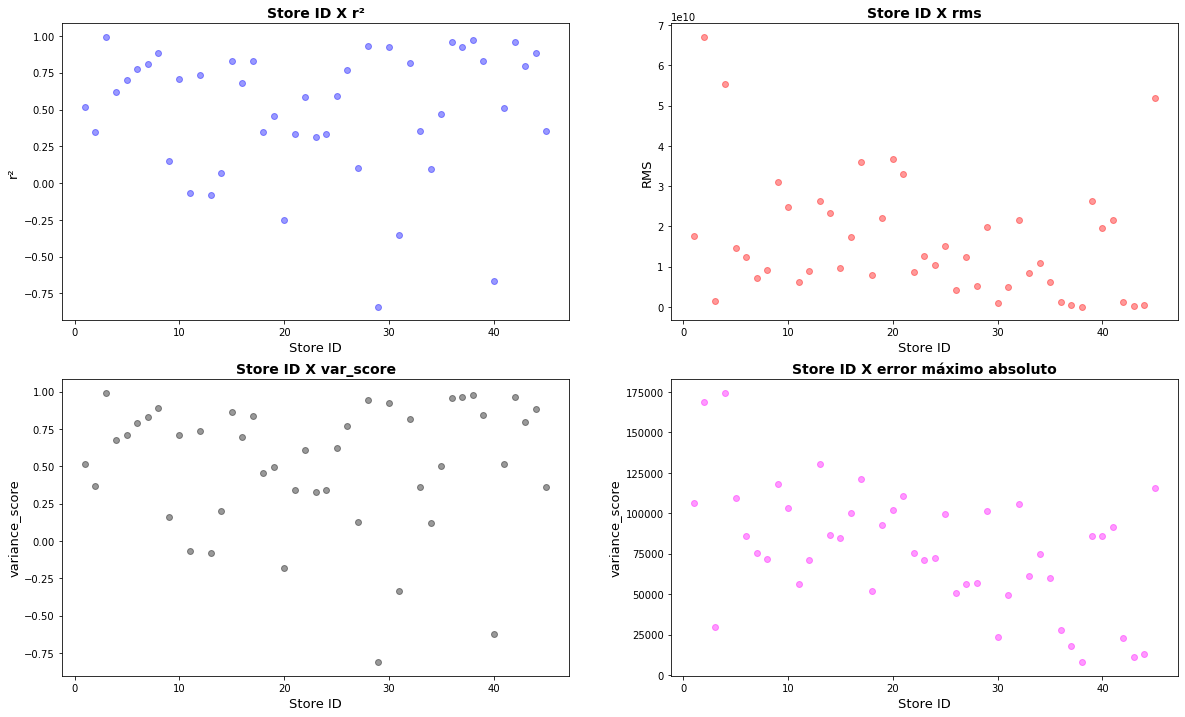

In [25]:
#Lista de Store ID
st = np.arange(1,46,1)
#Definindo Figura dos Gráficos
plt.figure(figsize=(20,12))
#1° -> R2
plt.subplot(221)
plt.scatter(st, R_Squared,c='blue', alpha=0.4)
plt.title('Store ID X r²', fontsize= 14, fontweight = 600)
plt.xlabel('Store ID', fontsize=13)
plt.ylabel('r²', fontsize=13)
#2° -> rms
plt.subplot(222)
plt.scatter(st, Mean_Squared,c='red', alpha=0.4)
plt.title('Store ID X rms', fontsize= 14, fontweight=600)
plt.xlabel('Store ID', fontsize=13)
plt.ylabel('RMS', fontsize=13)
#3° -> Variancia Explicada
plt.subplot(223)
plt.scatter(st, explained_variance_m1,c='black', alpha=0.4)
plt.title('Store ID X var_score', fontsize= 14, fontweight=600)
plt.xlabel('Store ID', fontsize=13)
plt.ylabel('variance_score', fontsize=13)
#4° -> Erro máximo absoluto
plt.subplot(224)
plt.scatter(st, mean_max_abs_error_m1,c='magenta', alpha=0.4)
plt.title('Store ID X error máximo absoluto', fontsize= 14, fontweight=600)
plt.xlabel('Store ID', fontsize=13)
plt.ylabel('variance_score', fontsize=13)
plt.show()

___
<div id="Validação_Cruzada_Modelo_1"></div>

### Validação Cruzada - Modelo 1

Antes do plot dos dados da validação cruzada, vamos entender como esses dados foram medidos.

Separamos as 52 informações de cada loja, a partir deste ponto, a biblioteca de validação cruzada agrupou em 13 grupos de 4 dados, aplicando o método como explicado anteriormente. Em cada rodada de teste, foi medido as 4 métricas utilizadas, deste modo temos um grupo de dados para loja. Para melhor interpretação, tiramos a média e o desvio padrão de cada grupo, deste modo condensando esse grupo de informações em um único grupo.

Portanto, no plot que veremos a seguir cada ponto representa uma informação condensada, sendo os gráficos em vermelho a média dos valores e os pontos em azul o desvio padrão das medidas.

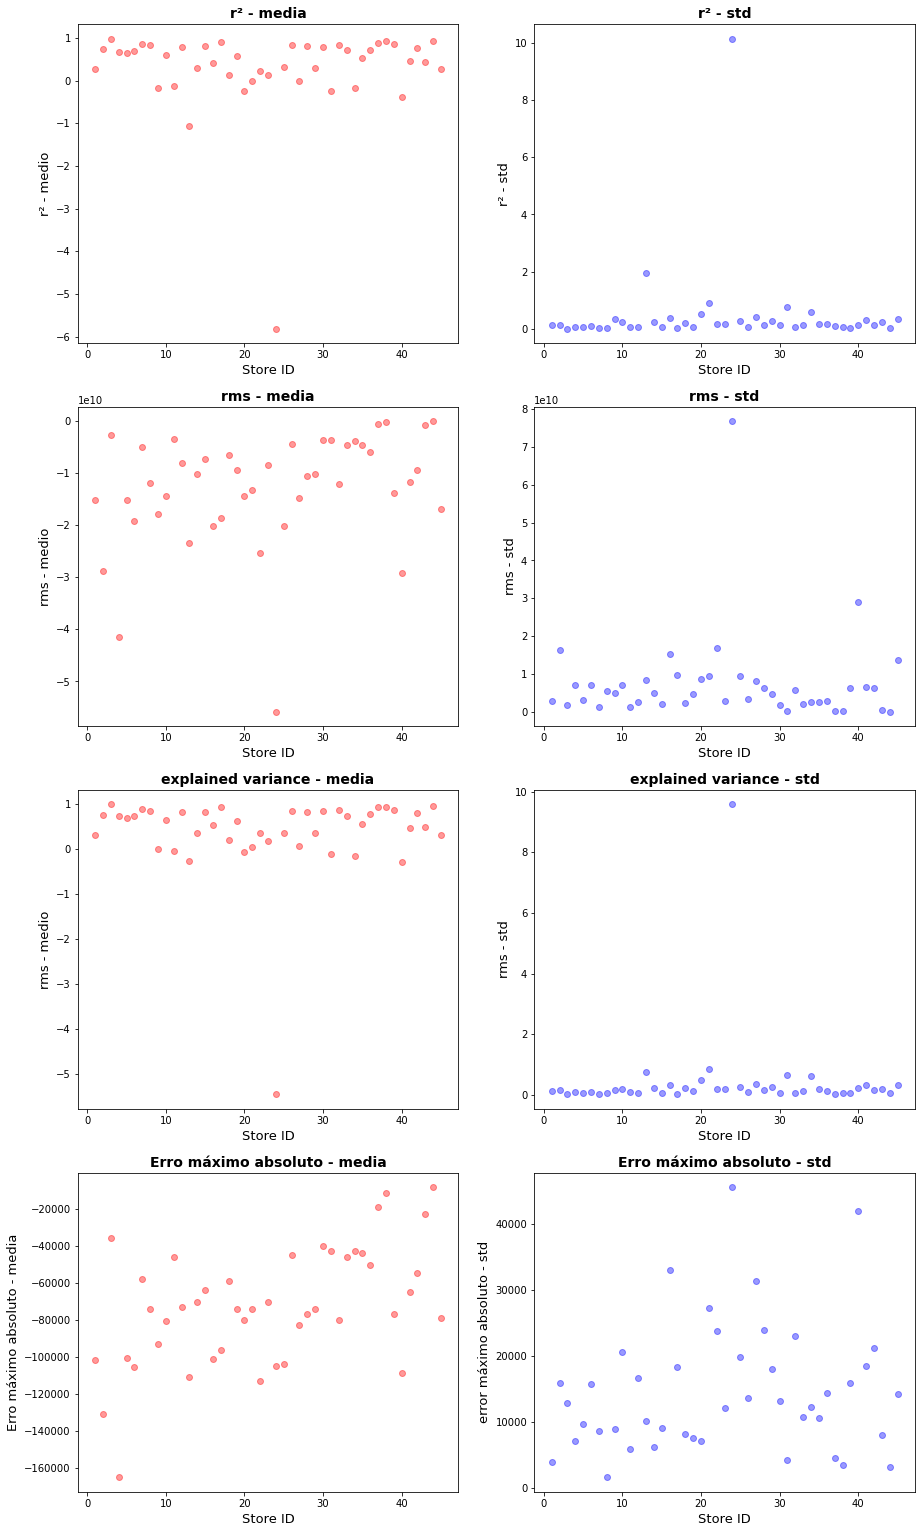

In [26]:
#Definindo Figure dos Gráficos
plt.figure(figsize=(15,27))

#1°Subplot -> R2 - média
plt.subplot(421)
plt.scatter(st, r2_cross_m,c='red', alpha=0.4)
plt.title('r² - media', fontsize= 14, fontweight = 600)
plt.xlabel('Store ID', fontsize=13)
plt.ylabel('r² - medio', fontsize=13)
#2°Subplot -> R2 - Desvio Padrão
plt.subplot(422)
plt.scatter(st, r2_cross_std,c='blue', alpha=0.4)
plt.title('r² - std', fontsize= 14, fontweight = 600)
plt.xlabel('Store ID', fontsize=13)
plt.ylabel('r² - std', fontsize=13)
#3°Subplot -> rms - média
plt.subplot(423)
plt.scatter(st, mean_square_cross_m,c='red', alpha=0.4)
plt.title('rms - media', fontsize= 14, fontweight = 600)
plt.xlabel('Store ID', fontsize=13)
plt.ylabel('rms - medio', fontsize=13)
#4°Subplot -> rms - Desvio padrão
plt.subplot(424)
plt.scatter(st, mean_square_cross_std,c='blue', alpha=0.4)
plt.title('rms - std', fontsize= 14, fontweight = 600)
plt.xlabel('Store ID', fontsize=13)
plt.ylabel('rms - std', fontsize=13)
#5°Subplot -> Variancia - Média
plt.subplot(425)
plt.scatter(st, explained_var_cross_m,c='red', alpha=0.4)
plt.title('explained variance - media', fontsize= 14, fontweight = 600)
plt.xlabel('Store ID', fontsize=13)
plt.ylabel('rms - medio', fontsize=13)
#6°Subplot -> Variancia - Desvio Padrão
plt.subplot(426)
plt.scatter(st, explained_var_cross_std,c='blue', alpha=0.4)
plt.title('explained variance - std', fontsize= 14, fontweight = 600)
plt.xlabel('Store ID', fontsize=13)
plt.ylabel('rms - std', fontsize=13)
#7°Subplot -> Erro máximo Absoluto - Médio
plt.subplot(427)
plt.scatter(st, mean_max_error_m,c='red', alpha=0.4)
plt.title('Erro máximo absoluto - media', fontsize= 14, fontweight = 600)
plt.xlabel('Store ID', fontsize=13)
plt.ylabel('Erro máximo absoluto - media', fontsize=13)
#8°Subplot -> Erro máximo Absoluto - Desvio Padrão
plt.subplot(428)
plt.scatter(st, mean_max_error_std,c='blue', alpha=0.4)
plt.title('Erro máximo absoluto - std', fontsize= 14, fontweight = 600)
plt.xlabel('Store ID', fontsize=13)
plt.ylabel('error máximo absoluto - std', fontsize=13)

plt.show()

Como pode-se verificar no gráfico de r² médio, temos algumas lojas com o score próximo de 1, o ideal. Comportamento também verificando antes da validação cruzada, evidenciando que o modelo está correto. Também pode-se perceber que no gráfico do desvio padrão dos dados coletas da validação cruzada temos algumas lojas outliers, fato se explica devido ao fato do modelo não explicar o comportamento dessas lojas.

O gráfico de erro médio quadrático evidência que apenas algumas lojas têm um erro próximo de zero, pode-se inferir que o modelo não adere muito bem a todas as lojas devido a esse fato. Nesse viés, o gráfico de variação explicada tenta trazer a mesma informação, a diferença é que quanto mais próximo de 1, melhor o modelo adere.

Por último, no gráfico de erro máximo absoluto verifica-se uma grande dispersão, nota-se que o modelo está errando para menos, deste modo, os pontos mais altos no eixo y representam os menores erros encontrados.

____
<div id="Decision_Tree_Regressor"></div>

### Decision Tree Regressor - Modelo 2

Para a construção deste modelo não há a necessidade de separar a base de dados em Treinamento e teste, uma vez que essa ação já foi realizada na seção `Construção do Modelo`.
Havendo apenas a necessidade de chamar os dados representados por:

- <b>Xi[loja][0]</b> = X de treinamento para uma dada loja;
- <b>Xi[loja][1]</b> = X de teste para uma dada loja;
- <b>Yi[loja][0]</b> = Y de treinamento para uma dada loja;
- <b>Yi[loja][1]</b> = Y de teste para uma dada loja.

onde "loja" é o ID loja-1, deste modo, variando de 0 a 44.

[0.08865642019301932, 0.15272131259970453, 0.35389757805396377, 0.40472468915331244]


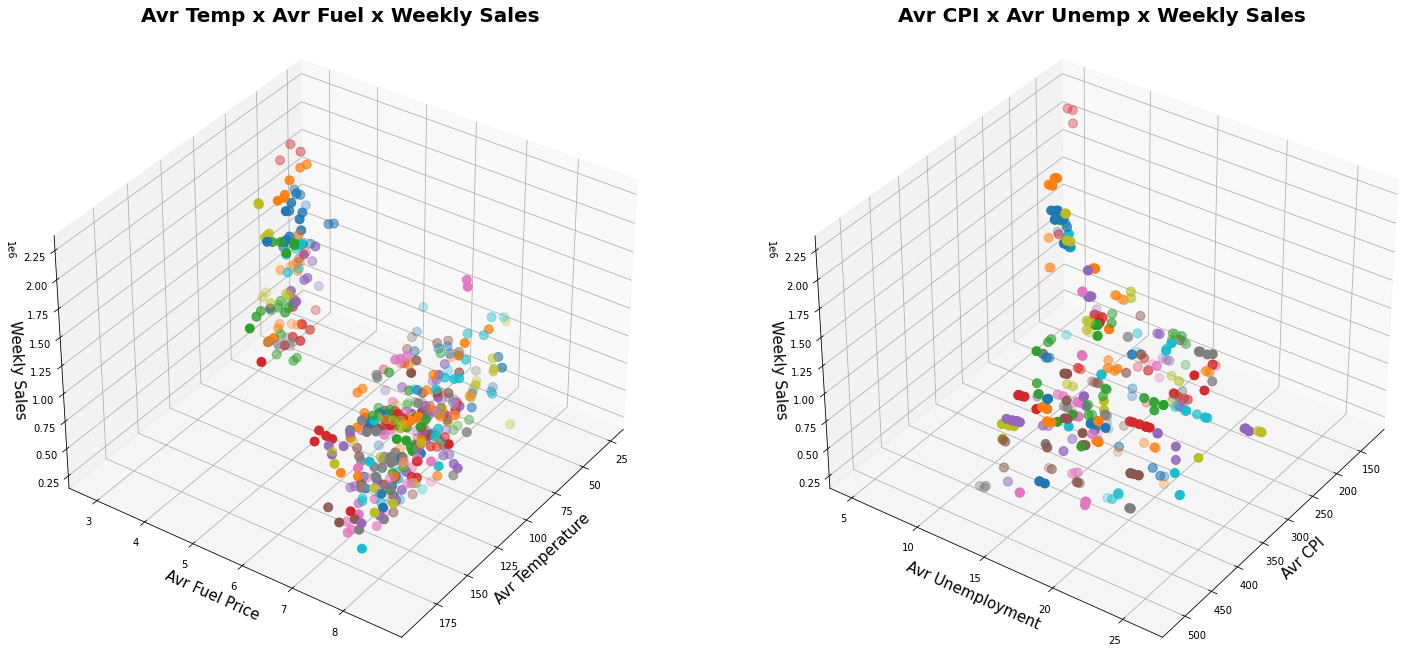

In [27]:
#==== Banco de Variaveis e Resultados ====
#Informações unitarias (Cada Store ID)
Mean_Squared2 = []
R_Squared2 = []
explained_variance_m2 = []
mean_max_abs_error_m2 = []
#Predição
Y_Prediction2 = []
Importance_m2 = []
#Definindo Figura do gráfico 3D
fig = plt.figure(figsize=(25,16))
#Definindo 2 Eixos com Projeção 3d
ax = fig.add_subplot(121,projection="3d")
ax2 = fig.add_subplot(122,projection="3d")

#Setando Labels e Título
ax.set_xlabel("Avr Temperature", fontsize=15)
ax.set_ylabel("Avr Fuel Price", fontsize=15)
ax.set_zlabel("Weekly Sales",fontsize=15)
ax2.set_xlabel("Avr CPI",fontsize=15)
ax2.set_ylabel("Avr Unemployment",fontsize=15)
ax2.set_zlabel("Weekly Sales",fontsize=15)
ax2.set_title("Avr CPI x Avr Unemp x Weekly Sales",fontsize=20, fontweight=750)
ax.set_title("Avr Temp x Avr Fuel x Weekly Sales",fontsize=20, fontweight=750)
#Definindo angulatura de visão
ax.view_init(35,35)
ax2.view_init(35,35)

# vetor para guardar as informações do cross validation e plotagem de gráficos futura
# vetores com final m guardam a média dos valores
r2_cross_m_m2 = []
mean_square_cross_m_m2 = []
explained_var_cross_m_m2 = []
mean_max_error_m_m2 = []

# já os vetores com std no final, guardam o desvio padrão da amostra
r2_cross_std_m2 = []
mean_square_cross_std_m2 = []
explained_var_cross_std_m2 = []
mean_max_error_std_m2 = []

for loja in range(0,45):
    #==== Criando Variaveis e Objetos ====
    # Regrassão 2 - TreeRegressor
    regr_1 = DecisionTreeRegressor(max_depth=2)
    regr_1.fit(Xi[loja][0], Yi[loja][0]) #Dados de Treinamento
    # Previsão
    sales_y_pred2 = regr_1.predict(Xi[loja][1])
    Y_Prediction2.append(sales_y_pred2)
    
    #Média Quadratica
    m2 = mean_squared_error(Yi[loja][1], sales_y_pred2)
    Mean_Squared2.append(m2)
    #R Quadrado
    r2 = r2_score(Yi[loja][1], sales_y_pred2)
    R_Squared2.append(r2)
    # explanaid variance
    explained_variance_m2.append(explained_variance_score(Yi[loja][1],sales_y_pred2))
    # Mean_absolute_error
    mean_max_abs_error_m2.append(mean_absolute_error(Yi[loja][1],sales_y_pred2))
    
    #Plot Gráfico 3D - Avr's Temp, Fuel, CPI, Unemp x Weekly_Sales
    ax.scatter3D(Xi[loja][1]["Avr Temp"],Xi[loja][1]["Avr Fuel"],sales_y_pred2,s=80) 
    ax2.scatter3D(Xi[loja][1]["Avr CPI"],Xi[loja][1]["Avr Unemp"],sales_y_pred2,s=80)  
    
    # preparando as features para a validação cruzada
    # precisamos separar as colunas da loja especificada, para a biblioteca trabalhar em cima da loja e feature correta
    # Como Xteste e Xtreinamento já é a feature que eu preciso, basta concatenar a passar esse valar para a crossvalid
    x = pd.concat([Xi[loja][0],Xi[loja][1]],ignore_index = True)
    y = pd.concat([Yi[loja][0],Yi[loja][1]],ignore_index = True)
    
    # na validação cruzada o argumento cv é o número de partições que faremos
    # como temos 52 dados, e 52 = 2²*13, vamos dividir em 13 grupos de 4 amostras
    
    # metricas para a validaçao cruzada
    #'r2','neg_mean_squared_error','explained_variance'
    # as metricas possuem um mnemonico correto, segue o link onde encontrar o mnemonico correto
    # https://scikit-learn.org/stable/modules/model_evaluation.html
    # para r²
    r2 = cross_val_score(regr_1,x,y, scoring = 'r2', cv = 4)
    r2_cross_m_m2.append(r2.mean())
    r2_cross_std_m2.append(r2.std())
    # erro médio quadratico
    media = cross_val_score(regr_1,x,y, scoring = 'neg_mean_squared_error', cv = 4)
    mean_square_cross_m_m2.append(media.mean())
    mean_square_cross_std_m2.append(media.std())
    # explanaid variance
    var_exp = cross_val_score(regr_1,x,y, scoring = 'explained_variance', cv = 4)
    explained_var_cross_m_m2.append(var_exp.mean())
    explained_var_cross_std_m2.append(var_exp.std())
    # error máximo absoluto
    mean_max_error = cross_val_score(regr_1,x,y, scoring = 'neg_mean_absolute_error', cv = 4)
    mean_max_error_m_m2.append(mean_max_error.mean())
    mean_max_error_std_m2.append(mean_max_error.std())
    #Importância
    Importance_m2.append(regr_1.feature_importances_)

    
temp2 = 0
fuel2 = 0
cpi2 = 0
unemp2 = 0
for e in range(len(Importance_m2)):
    temp2 += Importance_m2[e][0]
    fuel2 += Importance_m2[e][1]
    cpi2 += Importance_m2[e][2]
    unemp2 += Importance_m2[e][3]
temp2 = temp2/len(Importance_m2)
fuel2 = fuel2/len(Importance_m2)
cpi2 =  cpi2/len(Importance_m2)
unemp2 = unemp2/len(Importance_m2)
Importancia_Feature2 = [temp2,fuel2,cpi2,unemp2]
print(Importancia_Feature2)
plt.show()

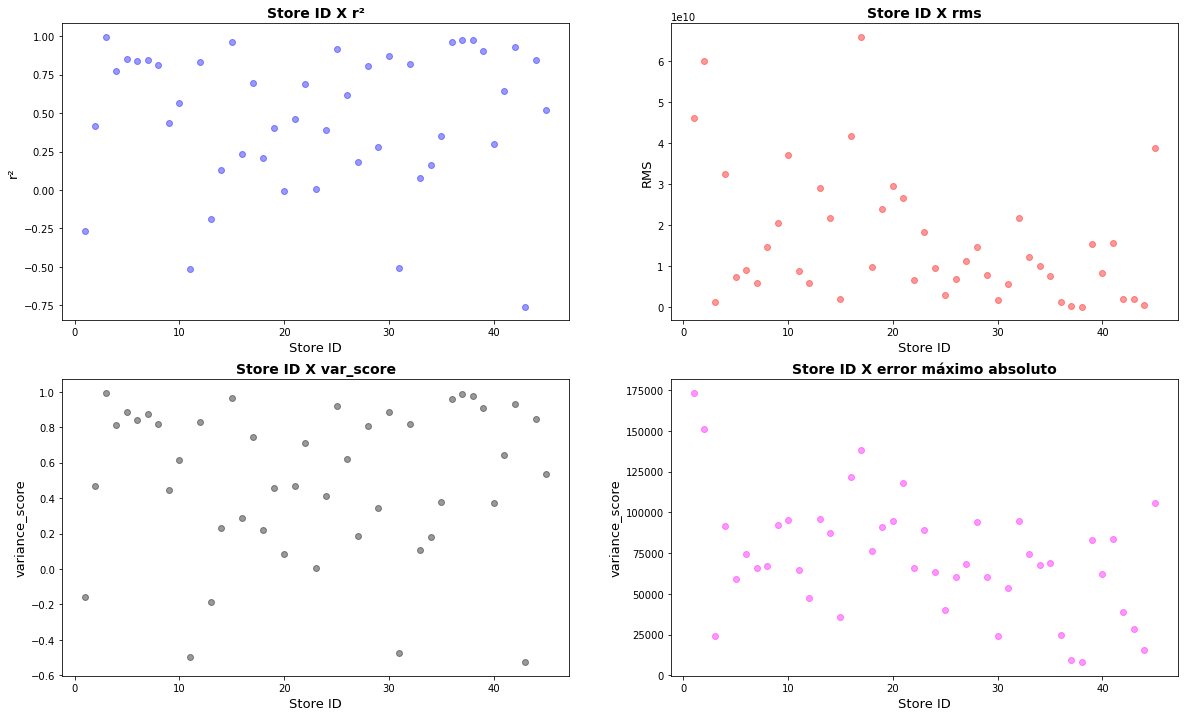

In [28]:
#Definição de Figura + Figsize
plt.figure(figsize=(20,12))
#Criação 1° Subplot
plt.subplot(221)
plt.scatter(st, R_Squared2,c='blue', alpha=0.4) #Definindo gráfico como Scatter
plt.title('Store ID X r²', fontsize= 14, fontweight = 600)
plt.xlabel('Store ID', fontsize=13)
plt.ylabel('r²', fontsize=13)
#Criação 2° Subplot
plt.subplot(222)
plt.scatter(st, Mean_Squared2,c='red', alpha=0.4) #Definindo gráfico como Scatter
plt.title('Store ID X rms', fontsize= 14, fontweight = 600)
plt.xlabel('Store ID', fontsize=13)
plt.ylabel('RMS', fontsize=13)
#Criação 3° Subplot
plt.subplot(223)
plt.scatter(st, explained_variance_m2,c='black', alpha=0.4) #Definindo gráfico como Scatter
plt.title('Store ID X var_score', fontsize= 14, fontweight=600)
plt.xlabel('Store ID', fontsize=13)
plt.ylabel('variance_score', fontsize=13)
plt.subplot(224)
# criançao do 4º subplot
plt.scatter(st, mean_max_abs_error_m2,c='magenta', alpha=0.4) #Definindo gráfico como Scatter
plt.title('Store ID X error máximo absoluto', fontsize= 14, fontweight=600)
plt.xlabel('Store ID', fontsize=13)
plt.ylabel('variance_score', fontsize=13)
plt.show()

<div id="Validação_Cruzada_Modelo_2"></div>

### Validação Cruzada - Modelo 2

Antes do plot dos dados da validação cruzada, vamos entender como esses dados foram medidos.

Separamos as 52 informações de cada loja, a partir deste ponto, a biblioteca de validação cruzada agrupou em 13 grupos de 4 dados, aplicando o método como explicado anteriormente. Em cada rodada de teste, foi medido as 4 métricas utilizadas, deste modo temos um grupo de dados para loja. Para melhor interpretação, tiramos a média e o desvio padrão de cada grupo, deste modo condensando esse grupo de informações em um único grupo.

Portanto, no plot que veremos a seguir cada ponto representa uma informação condensada, sendo os gráficos em vermelho a média dos valores e os pontos em azul o desvio padrão das medidas.

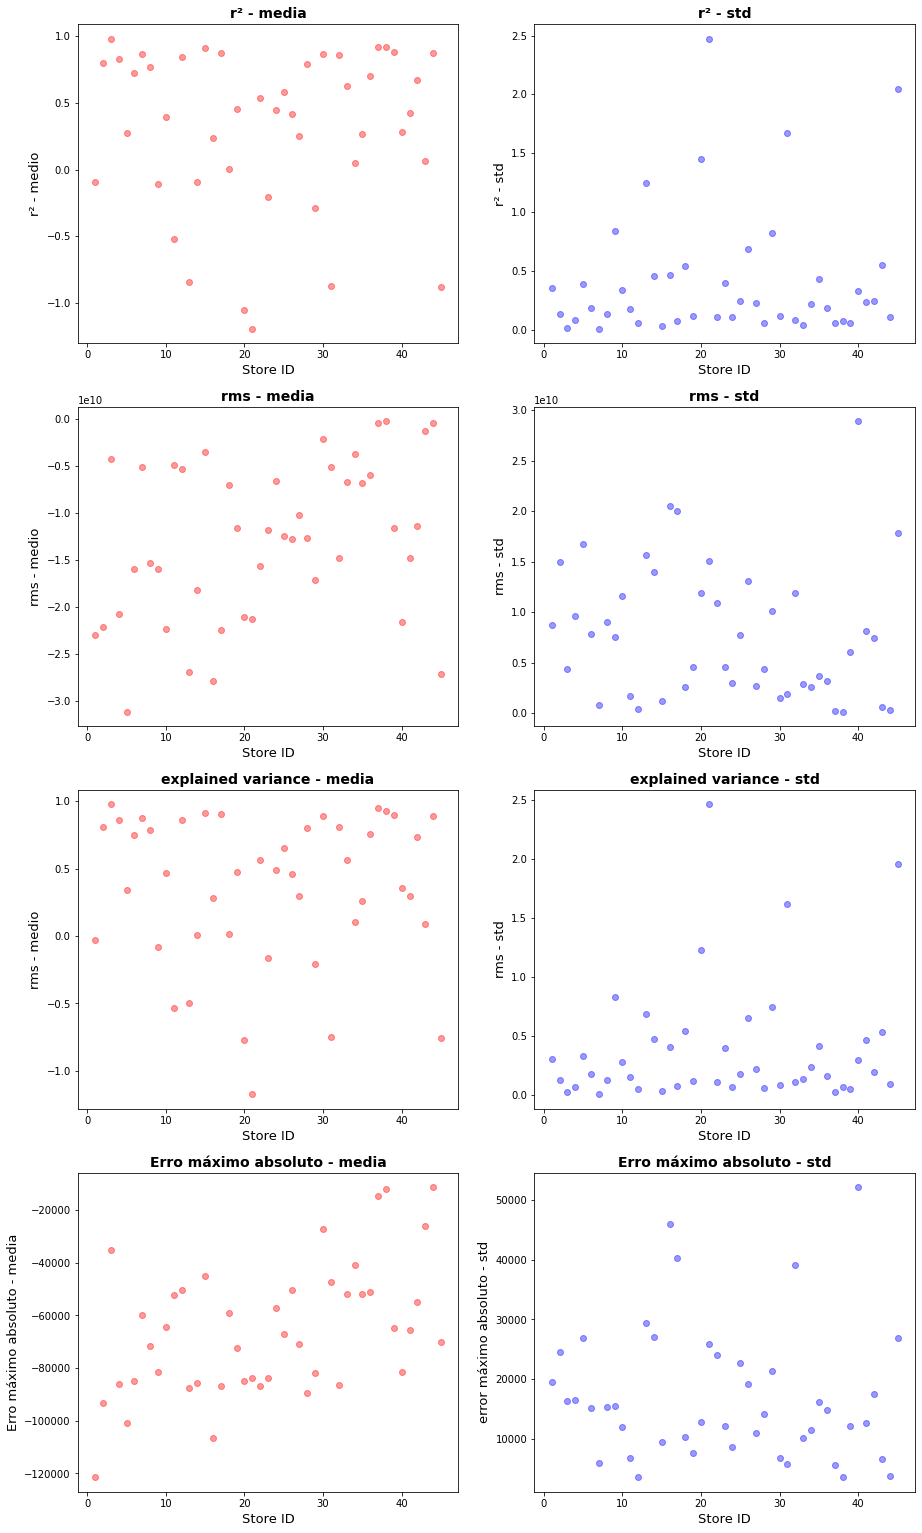

In [29]:
#Definindo Figure dos Gráficos
plt.figure(figsize=(15,27))
#1°Subplot -> R2 - média
plt.subplot(421)
plt.scatter(st, r2_cross_m_m2,c='red', alpha=0.4)
plt.title('r² - media', fontsize= 14, fontweight = 600)
plt.xlabel('Store ID', fontsize=13)
plt.ylabel('r² - medio', fontsize=13)
#2°Subplot -> R2 - Desvio Padrão
plt.subplot(422)
plt.scatter(st, r2_cross_std_m2,c='blue', alpha=0.4)
plt.title('r² - std', fontsize= 14, fontweight = 600)
plt.xlabel('Store ID', fontsize=13)
plt.ylabel('r² - std', fontsize=13)
#3°Subplot -> rms - média
plt.subplot(423)
plt.scatter(st, mean_square_cross_m_m2,c='red', alpha=0.4)
plt.title('rms - media', fontsize= 14, fontweight = 600)
plt.xlabel('Store ID', fontsize=13)
plt.ylabel('rms - medio', fontsize=13)
#4°Subplot -> rms - Desvio padrão
plt.subplot(424)
plt.scatter(st, mean_square_cross_std_m2,c='blue', alpha=0.4)
plt.title('rms - std', fontsize= 14, fontweight = 600)
plt.xlabel('Store ID', fontsize=13)
plt.ylabel('rms - std', fontsize=13)
#5°Subplot -> Variancia - Média
plt.subplot(425)
plt.scatter(st, explained_var_cross_m_m2,c='red', alpha=0.4)
plt.title('explained variance - media', fontsize= 14, fontweight = 600)
plt.xlabel('Store ID', fontsize=13)
plt.ylabel('rms - medio', fontsize=13)
#6°Subplot -> Variancia - Desvio Padrão
plt.subplot(426)
plt.scatter(st, explained_var_cross_std_m2,c='blue', alpha=0.4)
plt.title('explained variance - std', fontsize= 14, fontweight = 600)
plt.xlabel('Store ID', fontsize=13)
plt.ylabel('rms - std', fontsize=13)
#7°Subplot -> Erro máximo Absoluto - Médio
plt.subplot(427)
plt.scatter(st, mean_max_error_m_m2,c='red', alpha=0.4)
plt.title('Erro máximo absoluto - media', fontsize= 14, fontweight = 600)
plt.xlabel('Store ID', fontsize=13)
plt.ylabel('Erro máximo absoluto - media', fontsize=13)
#8°Subplot -> Erro máximo Absoluto - Desvio Padrão
plt.subplot(428)
plt.scatter(st, mean_max_error_std_m2,c='blue', alpha=0.4)
plt.title('Erro máximo absoluto - std', fontsize= 14, fontweight = 600)
plt.xlabel('Store ID', fontsize=13)
plt.ylabel('error máximo absoluto - std', fontsize=13)

plt.show()

Como pode-se verificar no gráfico de r² médio, temos algumas lojas com o score próximo de 1, o ideal. Comportamento também verificando antes da validação cruzada, evidenciando que o modelo está correto. Também pode-se perceber que no gráfico do desvio padrão dos dados coletas da validação cruzada temos algumas lojas outliers, fato se explica devido ao fato do modelo não explicar o comportamento dessas lojas. Por outro viés, percebe-se uma quantidade maior de lojas com r², logo, o modelo 2 é melhor que o modelo 1.

Por outro lado, o gráfico de erro médio quadrático evidência que apenas algumas lojas têm um erro próximo de zero, pode-se inferir que o modelo não adere muito bem a todas as lojas devido a esse fato. Nesse viés, o gráfico de variação explicada tenta trazer a mesma informação, a diferença é que quanto mais próximo de 1, melhor o modelo adere.

Por último, no gráfico de erro máximo absoluto verifica-se uma grande dispersão, nota-se que o modelo está errando para menos, deste modo, os pontos mais altos no eixo y representam os menores erros encontrados.

Em face do exposto, é axiomático que o modelo 2 adere melhor ao grupo das 45 lojas, ao se comparar as métricas com os gráficos da validação cruzada do modelo 1. A comparação entre os modelos mais afundo será feita mais adiante.

____
<div id="Random_Tree_Regressor"></div>

### Random Tree Regressor - Modelo 3
Para a construção deste modelo não há a necessidade de separar a base de dados em Treinamento e teste, uma vez que essa ação já foi realizada na seção `Construção do Modelo`.
Havendo apenas a necessidade de chamar os dados representados por:

- <b>Xi[loja][0]</b> = X de treinamento para uma dada loja;
- <b>Xi[loja][1]</b> = X de teste para uma dada loja;
- <b>Yi[loja][0]</b> = Y de treinamento para uma dada loja;
- <b>Yi[loja][1]</b> = Y de teste para uma dada loja.

onde "loja" é o ID loja-1, deste modo, variando de 0 a 44.

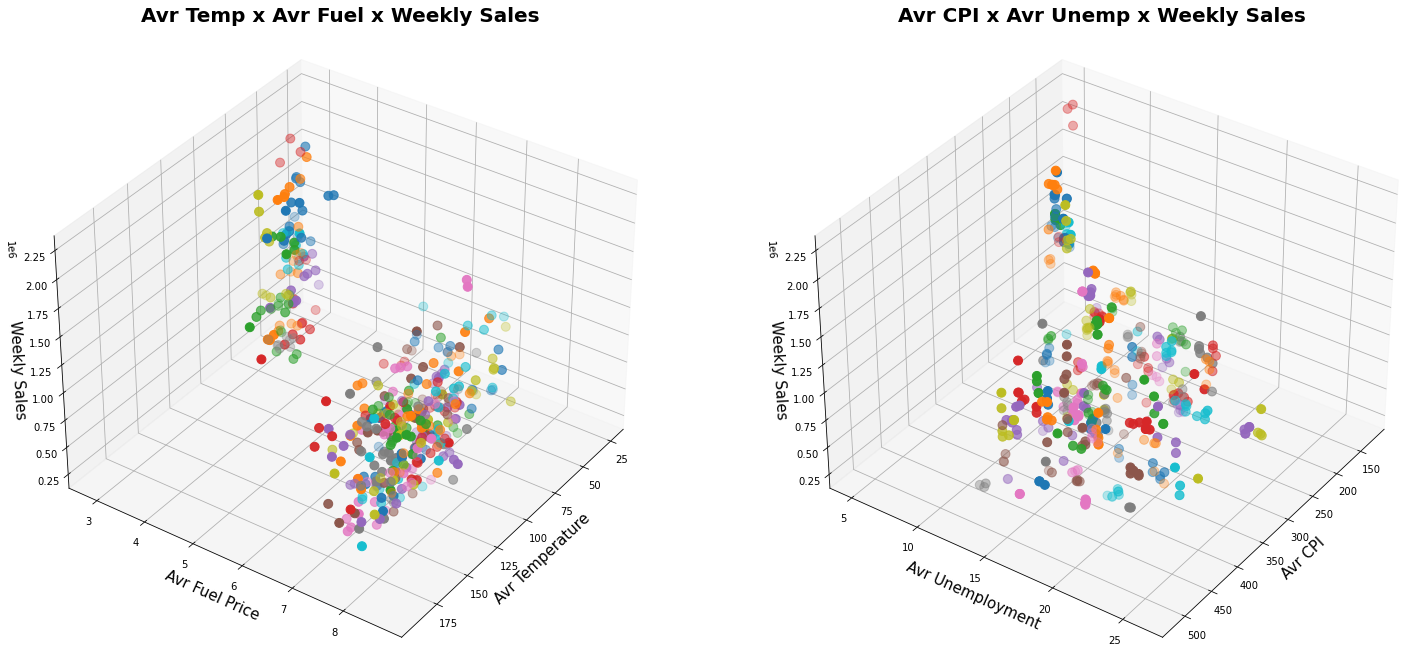

In [30]:
#==== Banco de Variaveis e Resultados ====
#Informações unitarias (Cada Store ID)
Mean_Squared3 = []
R_Squared3 = []
explained_variance_m3 = []
mean_max_abs_error_m3 = []
#Predição
Y_Prediction3 = []
Importance_m3 = []
#Criando Fig - Gráfico
fig = plt.figure(figsize=(25,16))
#Adição ao Eixo 2 Subplots com Projeção 3D
ax3 = fig.add_subplot(121,projection="3d")
ax4 = fig.add_subplot(122,projection="3d")
#Definindo Labels
ax3.set_xlabel("Avr Temperature", fontsize=15)
ax3.set_ylabel("Avr Fuel Price", fontsize=15)
ax3.set_zlabel("Weekly Sales",fontsize=15)
ax3.set_title("Avr Temp x Avr Fuel x Weekly Sales",fontsize=20, fontweight=750)
ax4.set_xlabel("Avr CPI",fontsize=15)
ax4.set_ylabel("Avr Unemployment",fontsize=15)
ax4.set_zlabel("Weekly Sales",fontsize=15)
ax4.set_title("Avr CPI x Avr Unemp x Weekly Sales",fontsize=20, fontweight=750)
#Definindo Angulatura de visualização
ax3.view_init(35,35)
ax4.view_init(35,35)

# vetor para guardar as informações do cross validation e plotagem de gráficos futura
# vetores com final m guardam a média dos valores
r2_cross_m_m3 = []
mean_square_cross_m_m3 = []
explained_var_cross_m_m3 = []
mean_max_error_m_m3 = []
# já os vetores com std no final, guardam o desvio padrão da amostra
r2_cross_std_m3 = []
mean_square_cross_std_m3 = []
explained_var_cross_std_m3 = []
mean_max_error_std_m3 = []

for loja in range(0,45):
    #==== Criando Variaveis e Objetos ====
    # Regrassão 2 - TreeRegressor
    regr_2 = DecisionTreeRegressor(random_state=0)
    regr_2.fit(Xi[loja][0], Yi[loja][0]) #Dados de Treinamento
    # Previsão
    sales_y_pred3 = regr_2.predict(Xi[loja][1])
    Y_Prediction3.append(sales_y_pred3)
      
    #Média Quadratica
    m3 = mean_squared_error(Yi[loja][1], sales_y_pred3)
    Mean_Squared3.append(m3)
    #R Quadrado
    r3 = r2_score(Yi[loja][1], sales_y_pred3)
    R_Squared3.append(r3)
    # explanaid variance 
    explained_variance_m3.append(explained_variance_score(Yi[loja][1],sales_y_pred3))
    # Mean_absolute_error
    mean_max_abs_error_m3.append(mean_absolute_error(Yi[loja][1],sales_y_pred3))
    
    #Plot Gráfico 3D
    ax3.scatter3D(Xi[loja][1]["Avr Temp"],Xi[loja][1]["Avr Fuel"],sales_y_pred3,s=80) 
    ax4.scatter3D(Xi[loja][1]["Avr CPI"],Xi[loja][1]["Avr Unemp"],sales_y_pred3,s=80) 
    
    # preparando as features para a validação cruzada
    # precisamos separar as colunas da loja especificada, para a biblioteca trabalhar em cima da loja e feature correta
    # Como Xteste e Xtreinamento já é a feature que eu preciso, basta concatenar a passar esse valar para a crossvalid
    x = pd.concat([Xi[loja][0],Xi[loja][1]],ignore_index = True)
    y = pd.concat([Yi[loja][0],Yi[loja][1]],ignore_index = True)
    
    # na validação cruzada o argumento cv é o número de partições que faremos
    # como temos 52 dados, e 52 = 2²*13, vamos dividir em 13 grupos de 4 amostras
    
    # metricas para a validaçao cruzada
    #'r2','neg_mean_squared_error','explained_variance'
    # as metricas possuem um mnemonico correto, segue o link onde encontrar o mnemonico correto
    # https://scikit-learn.org/stable/modules/model_evaluation.html
    # para r²
    r2 = cross_val_score(regr_2,x,y, scoring = 'r2', cv = 4)
    r2_cross_m_m3.append(r2.mean())
    r2_cross_std_m3.append(r2.std())
    # erro médio quadratico
    media = cross_val_score(regr_2,x,y, scoring = 'neg_mean_squared_error', cv = 4)
    mean_square_cross_m_m3.append(media.mean())
    mean_square_cross_std_m3.append(media.std())
    # explanaid variance
    var_exp = cross_val_score(regr_2,x,y, scoring = 'explained_variance', cv = 4)
    explained_var_cross_m_m3.append(var_exp.mean())
    explained_var_cross_std_m3.append(var_exp.std())
    # error máximo absoluto
    mean_max_error = cross_val_score(regr_2,x,y, scoring = 'neg_mean_absolute_error', cv = 4)
    mean_max_error_m_m3.append(mean_max_error.mean())
    mean_max_error_std_m3.append(mean_max_error.std())
    #Importância
    Importance_m3.append(regr_2.feature_importances_)

    
#==== Criando Importancia do Modelo ====
#Definindo Variaveis
temp = 0
fuel = 0
cpi = 0
unemp = 0
#Ralizandos contas e Média Simples
for e in range(len(Importance_m3)):
    temp += Importance_m3[e][0]
    fuel += Importance_m3[e][1]
    cpi += Importance_m3[e][2]
    unemp += Importance_m3[e][3]
temp = temp/len(Importance_m3)
fuel = fuel/len(Importance_m3)
cpi =  cpi/len(Importance_m3)
unemp = unemp/len(Importance_m3)
Importancia_Feature = [temp,fuel,cpi,unemp]
plt.show()

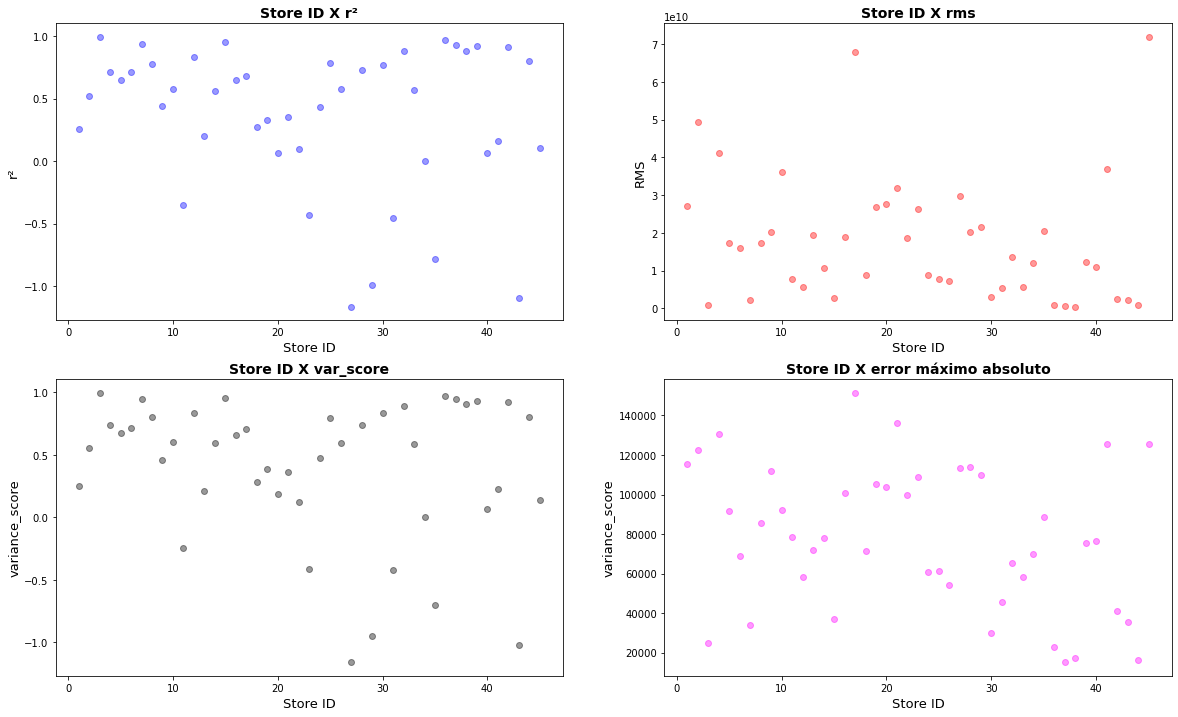

In [31]:
#Definindo Figura dos Gráficos
plt.figure(figsize=(20,12))

#1° -> R2 
plt.subplot(221)
plt.scatter(st, R_Squared3,c='blue', alpha=0.4)
plt.title('Store ID X r²', fontsize= 14, fontweight = 600)
plt.xlabel('Store ID', fontsize=13)
plt.ylabel('r²', fontsize=13)
#2° -> rms
plt.subplot(222)
plt.scatter(st, Mean_Squared3,c='red', alpha=0.4)
plt.title('Store ID X rms', fontsize=14, fontweight=600)
plt.xlabel('Store ID', fontsize=13)
plt.ylabel('RMS', fontsize=13)
#3° -> Variancia Explicada
plt.subplot(223)
plt.scatter(st, explained_variance_m3,c='black', alpha=0.4)
plt.title('Store ID X var_score', fontsize= 14, fontweight=600)
plt.xlabel('Store ID', fontsize=13)
plt.ylabel('variance_score', fontsize=13)
#4° -> Erro máximo absoluto
plt.subplot(224)
plt.scatter(st, mean_max_abs_error_m3,c='magenta', alpha=0.4)
plt.title('Store ID X error máximo absoluto', fontsize= 14, fontweight=600)
plt.xlabel('Store ID', fontsize=13)
plt.ylabel('variance_score', fontsize=13)
plt.show()

<div id="Validação_Cruzada_Modelo 3"></div>

### Validação Cruzada - Modelo 3

Antes do plot dos dados da validação cruzada, vamos entender como esses dados foram medidos.

Separamos as 52 informações de cada loja, a partir deste ponto, a biblioteca de validação cruzada agrupou em 13 grupos de 4 dados, aplicando o método como explicado anteriormente. Em cada rodada de teste, foi medido as 4 métricas utilizadas, deste modo temos um grupo de dados para loja. Para melhor interpretação, tiramos a média e o desvio padrão de cada grupo, deste modo condensando esse grupo de informações em um único grupo.

Portanto, no plot que veremos a seguir cada ponto representa uma informação condensada, sendo os gráficos em vermelho a média dos valores e os pontos em azul o desvio padrão das medidas.

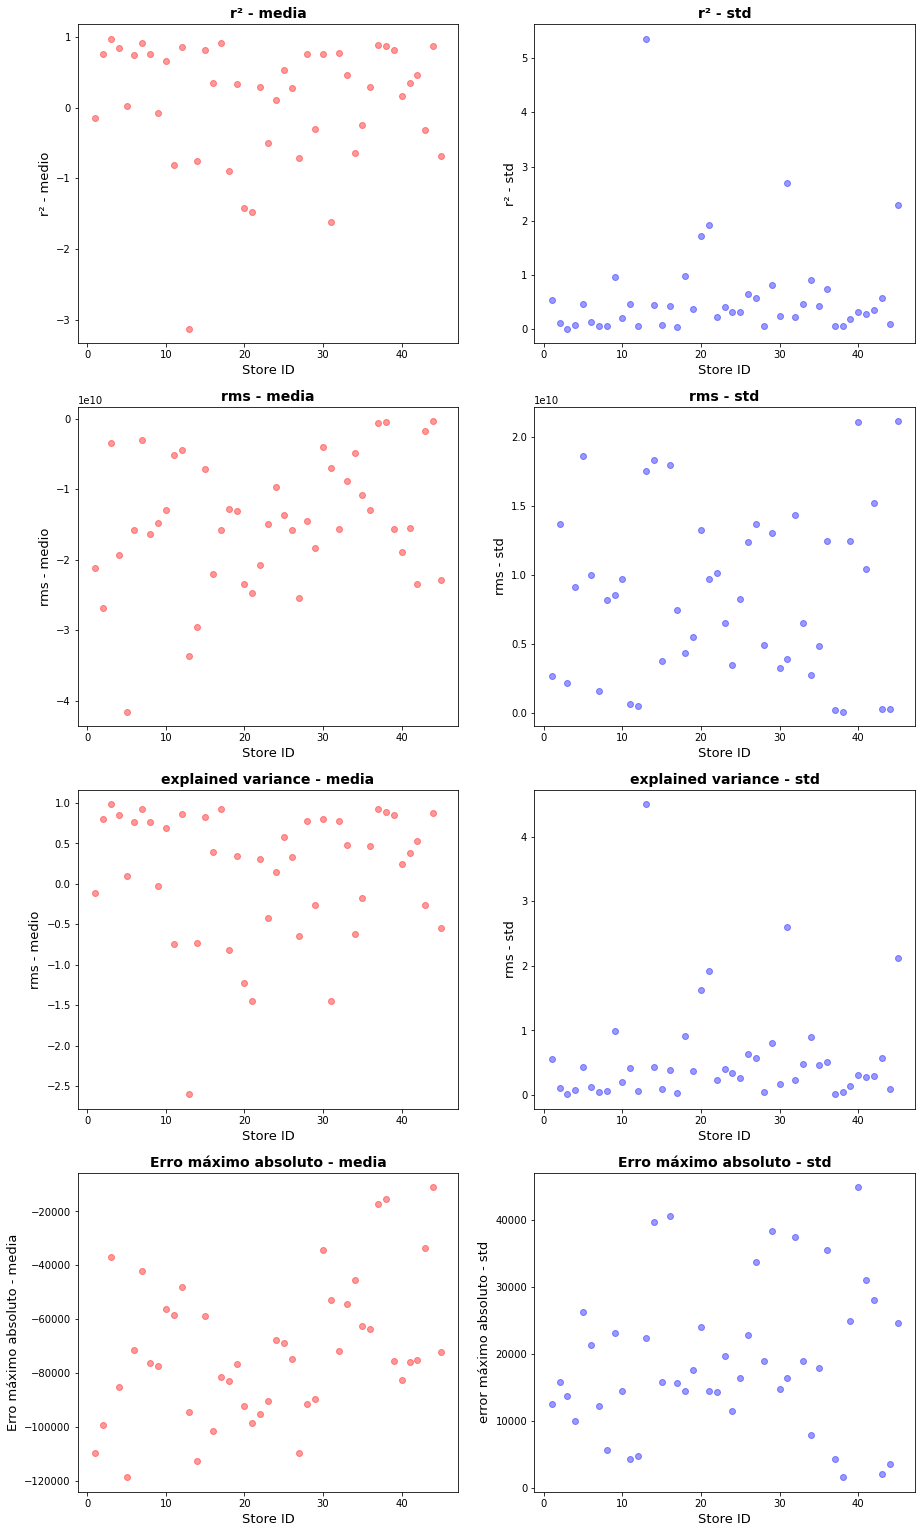

In [32]:
#Definindo Figure dos Gráficos
plt.figure(figsize=(15,27))

#1°Subplot -> R2 - média
plt.subplot(421)
plt.scatter(st, r2_cross_m_m3,c='red', alpha=0.4)
plt.title('r² - media', fontsize= 14, fontweight = 600)
plt.xlabel('Store ID', fontsize=13)
plt.ylabel('r² - medio', fontsize=13)
#2°Subplot -> R2 - Desvio Padrão
plt.subplot(422)
plt.scatter(st, r2_cross_std_m3,c='blue', alpha=0.4)
plt.title('r² - std', fontsize= 14, fontweight = 600)
plt.xlabel('Store ID', fontsize=13)
plt.ylabel('r² - std', fontsize=13)
#3°Subplot -> rms - média
plt.subplot(423)
plt.scatter(st, mean_square_cross_m_m3,c='red', alpha=0.4)
plt.title('rms - media', fontsize= 14, fontweight = 600)
plt.xlabel('Store ID', fontsize=13)
plt.ylabel('rms - medio', fontsize=13)
#4°Subplot -> rms - Desvio padrão
plt.subplot(424)
plt.scatter(st, mean_square_cross_std_m3,c='blue', alpha=0.4)
plt.title('rms - std', fontsize= 14, fontweight = 600)
plt.xlabel('Store ID', fontsize=13)
plt.ylabel('rms - std', fontsize=13)
#5°Subplot -> Variancia - Média
plt.subplot(425)
plt.scatter(st, explained_var_cross_m_m3,c='red', alpha=0.4)
plt.title('explained variance - media', fontsize= 14, fontweight = 600)
plt.xlabel('Store ID', fontsize=13)
plt.ylabel('rms - medio', fontsize=13)
#6°Subplot -> Variancia - Desvio Padrão
plt.subplot(426)
plt.scatter(st, explained_var_cross_std_m3,c='blue', alpha=0.4)
plt.title('explained variance - std', fontsize= 14, fontweight = 600)
plt.xlabel('Store ID', fontsize=13)
plt.ylabel('rms - std', fontsize=13)
#7°Subplot -> Erro máximo Absoluto - Médio
plt.subplot(427)
plt.scatter(st, mean_max_error_m_m3,c='red', alpha=0.4)
plt.title('Erro máximo absoluto - media', fontsize= 14, fontweight = 600)
plt.xlabel('Store ID', fontsize=13)
plt.ylabel('Erro máximo absoluto - media', fontsize=13)
#8°Subplot -> Erro máximo Absoluto - Desvio Padrão
plt.subplot(428)
plt.scatter(st, mean_max_error_std_m3,c='blue', alpha=0.4)
plt.title('Erro máximo absoluto - std', fontsize= 14, fontweight = 600)
plt.xlabel('Store ID', fontsize=13)
plt.ylabel('error máximo absoluto - std', fontsize=13)

plt.show()

Como pode-se verificar no gráfico de r² médio, temos algumas lojas com o score próximo de 1, o ideal. Comportamento também verificando antes da validação cruzada, evidenciando que o modelo está correto. Também pode-se perceber que no gráfico do desvio padrão dos dados coletas da validação cruzada temos algumas lojas outliers, fato se explica devido ao fato do modelo não explicar o comportamento dessas lojas. Por outro lado, verificamos que uma maior quantidade de lojas teve um r² em relação aos outros dois modelos, evidenciando que o modelo adere bastante nas 45 lojas como um todo.

O gráfico de erro médio quadrático evidência que apenas algumas lojas têm um erro próximo de zero, pode-se inferir que o modelo não adere muito bem a todas as lojas devido a esse fato. Nesse viés, o gráfico de variação explicada tenta trazer a mesma informação, a diferença é que quanto mais próximo de 1, melhor o modelo adere.

Por último, no gráfico de erro máximo absoluto verifica-se uma grande dispersão, nota-se que o modelo está errando para menos, deste modo, os pontos mais altos no eixo y representam os menores erros encontrados.

Portanto, verifica-se que o modelo 3 adere bem ao grupo das 45 lojas, mesmo que tenhamos algumas outliers. A comparação entre os 3 modelos seguirá a seguir.

___
<div id="Análise_dos_Modelos"></div>

### Análise dos Modelos

<div id="Sobreposição_r²"></div>

#### Sobreposição - r²

O coeficiente de determinação é um coeficiente estatístico utilizado para saber o quão certo o outcome de um modelo está e como este modelo replica de forma constante - sendo assim, se houver grande variação deste coeficiente para números  negativos conseguimos concluir que o modelo não está calibrado já que não consegue manter constância nos dados preditos. Uma vez que este coeficiente se aproxima de 1.00 mostra um modelo que tende a perfeiçao. 

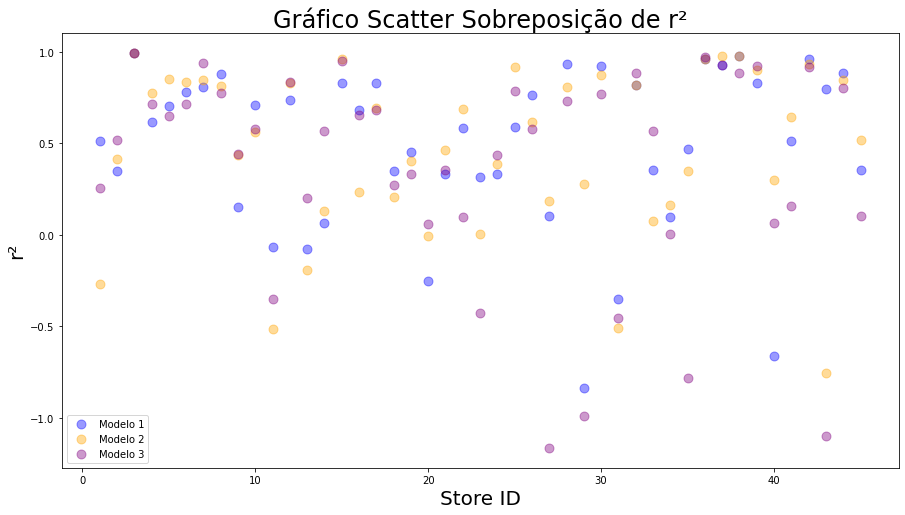

In [33]:
#Definindo Figura do Gráfico
plt.figure(figsize=(15,8))
#1° Scatter -> R_Squared - Modelo 1
plt.scatter(st,R_Squared, c="blue", alpha = 0.4, label="Modelo 1", s=80)
#2° Scatter -> R_Squared - Modelo 2
plt.scatter(st,R_Squared2, c="orange", alpha = 0.4, label="Modelo 2", s=80)
#3° Scatter -> R_Squared - Modelo 3
plt.scatter(st,R_Squared3, c="purple", alpha = 0.4, label="Modelo 3",s=80)
plt.title("Gráfico Scatter Sobreposição de r²", fontsize=24)
plt.xlabel("Store ID",fontsize=20)
plt.ylabel("r²", fontsize=20)
plt.legend()
plt.show()



O gráfico do coeficiente de determinação mostra que tanto para o Modelo 1, quanto para os modelos 2 e 3 os outputs ou predições se mantém constantes, não havendo grandes dispersões - Outliers fora do normal (uma ou outra loja com r² negativo, que não aderiu ao modelo em questão). Algo importante de citar é que não é possível traçar linhas para auxiliar na visualização deste dado, uma vez que no eixo X ele tem o ID de cada loja, o que possibilita a detecção das lojas com melhor índice de determinação - sendo assim mais próximos de um.

In [46]:
#Chamando Função que localiza números perto de 1
lojas_m1 = lojas_proximidades_um(R_Squared)
lojas_m2 = lojas_proximidades_um(R_Squared2)
lojas_m3 = lojas_proximidades_um(R_Squared3)
print(f"As lojas com melhor indice de dispersão do Modelo 1 são: {lojas_m1}, do Modelo 2 são: {lojas_m2} e do Modelo 3 são: {lojas_m3}")

As lojas com menos indice de dispersão do Modelo 1 são: [2, 27, 29, 35, 36, 37, 41], do Modelo 2 são: [2, 14, 24, 35, 36, 37, 38, 41] e do Modelo 3 são: [2, 6, 14, 35, 36, 38, 41]


<div id="Sobreposição_Erro_quadrático_médio"></div>

#### Sobreposição - Erro quadrático médio

O coeficiente de erro quadrático médio, ou mean squared error, é um coeficiente de comparação de estimadores, podendo apresentar vicio do modelo caso haja grande distanciação de 0, ou não vicio caso os estimadores se localizem perto de zero.


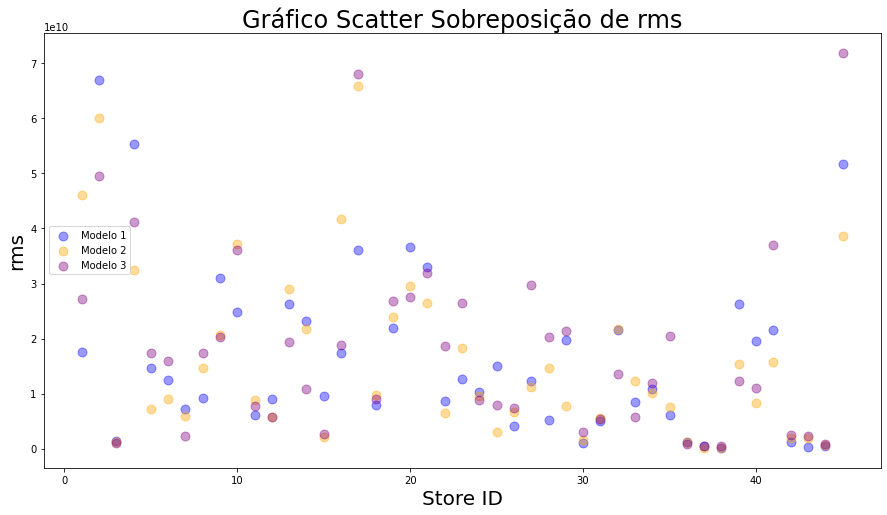

In [35]:
#Definindo Figura do Gráfico
plt.figure(figsize=(15,8))
#1° Scatter -> Mean Squared - Modelo 1
plt.scatter(st,Mean_Squared, c="blue", alpha = 0.4, label="Modelo 1", s=80)
#2° Scatter -> Mean Squared - Modelo 2
plt.scatter(st,Mean_Squared2, c="orange", alpha = 0.4, label="Modelo 2", s=80)
#3° Scatter -> Mean Squared - Modelo 3
plt.scatter(st,Mean_Squared3, c="purple", alpha = 0.4, label="Modelo 3",s=80)
plt.title("Gráfico Scatter Sobreposição de rms", fontsize=24)
plt.xlabel("Store ID",fontsize=20)
plt.ylabel("rms", fontsize=20)
plt.legend()
plt.show()

O gráfico de sobreposição do coeficiente de erro quadrático médio mostra que a predição dos modelos pode estar pouco viciada - principalmente nas lojas que ultrapassam 5 pontos no Eixo Y - porém, mesmo havendo a existência de vícios, é possível observar que a grande maioria dos dados se encontra muito próxima de zero, o que representa um erro quadrático médio pequeno quando comparado com os outros dados.

Na mesma ocorrência do gráfico de sobreposição da determinação, não é possível traçar comportamento dos modelos conforme as lojas avançam, por se tratar de cenários com valores diferentes para a Target e Features. Porém é possível perceber um comportamento médio dos modelos:
  
- Modelo 1:
Tende a ter maior distanciamento dos dados, por ser o modelo de menor complexidade não consegue manter a constância nos dados preditos - quando comparado aos outros modelos.

- Modelo 2 e 3:
O segundo modelo se aproximou muito do Modelo 3, uma vez que utilizam métodos complexos de correlação de variáveis como Machine Learning e Data Mining, conseguindo fazer conexões entre as diversas Features com a Target de melhor forma.
Porém ao realizar a média simples dos obtidos é possível argumentar que o Modelo 2 teve maior eficácia e têm em média um sistema menos viciado do que o Modelo 1 e 3. Sendo as medias dos mesmos:


In [36]:
#Realizando Médias simples
sum_Mean1 = sum(Mean_Squared)/len(Mean_Squared)
sum_Mean2 = sum(Mean_Squared2)/len(Mean_Squared2)
sum_Mean3 = sum(Mean_Squared3)/len(Mean_Squared3)
print(f"Se essa hipotese for verdadeira, o Modelo 2 teve maior eficácia: {sum_Mean1>sum_Mean2<sum_Mean3}")
print(f"A seguir estão as médias ponderadas de Mean_Sqaured: Modelo1: {sum_Mean1},Modelo 2: {sum_Mean2} e Modelo 3: {sum_Mean3}")

Se essa hipotese for verdadeira, o Modelo 2 teve maior eficácia: True
A seguir estão as médias ponderadas de Mean_Sqaured: Modelo1: 16262819812.524042,Modelo 2: 15979760062.193062 e Modelo 3: 17700213773.823627


<div id="Sobreposição - Explained Variance Score"></div>

#### Sobreposição_Explained_Variance_Score

O coeficiente, ou pontuação, de variação explicada é uma variável quantitativa que mensura a dispersão dos dados preditos - podendo ser, em alguns casos, classificada como a variância da Target.

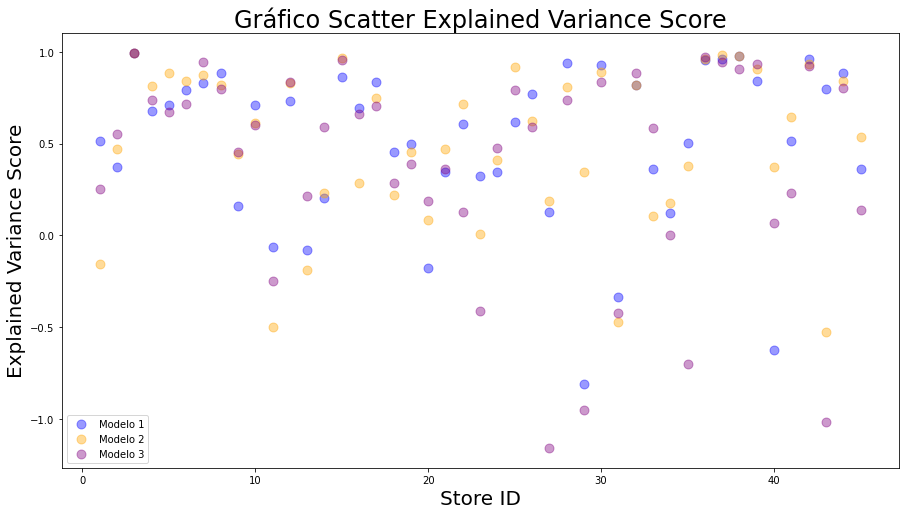

In [37]:
#Definindo Figure do Gráfico
plt.figure(figsize=(15,8))
#1° Scatter -> Explained Variance - Modelo 1
plt.scatter(st,explained_variance_m1, c="blue", alpha = 0.4, label="Modelo 1", s=80)
#2° Scatter -> Explained Variance - Modelo 2
plt.scatter(st,explained_variance_m2, c="orange", alpha = 0.4, label="Modelo 2", s=80)
#3° Scatter -> Explained Variance - Modelo 3
plt.scatter(st,explained_variance_m3, c="purple", alpha = 0.4, label="Modelo 3",s=80)
plt.title("Gráfico Scatter Explained Variance Score", fontsize=24)
plt.xlabel("Store ID",fontsize=20)
plt.ylabel("Explained Variance Score", fontsize=20)
plt.legend()
plt.show()

O melhor score possível para essa métrica é 1, ou seja, quanto mais próximo de 1 melhor o modelo aderiu a determinada loja, usa análise é similar ao fator r². Verifica-se que algumas lojas possuem um valor negativo, isso quer dizer que o modelo difere totalmente, não adere para aquela loja. Neste gráfico, nota-se que o modelo 3 tem uma maior quantidade de lojas que não aderiram bem ao modelo, por outro lado, ela tem uma grande quantidade de lojas que se aproximam da idealidade. Os outros dois modelos seguem padrão similar, e com lojas aderindo bem aos seus respectivos modelos, com scores próximos de 1, o ideal. 

O lado positivo dessa sobreposição é pode-se analisar loja a loja, e quanto mais alto for o valor para um dado x, melhor é o score daquele modelo para determinada loja.


In [38]:
#Realizando Médias Simples
sum_evs = sum(mean_max_abs_error_m1)/len(mean_max_abs_error_m1)
sum_evs2 = sum(mean_max_abs_error_m2)/len(mean_max_abs_error_m2)
sum_evs3 = sum(mean_max_abs_error_m3)/len(mean_max_abs_error_m3)
print(f"Se essa hipotese for verdadeira, o Modelo 2 teve menor variancia: {sum_evs>sum_evs2<sum_evs3}")
print(f"A seguir estão as médias ponderadas de Variancia: Modelo1: {sum_evs},Modelo 2: {sum_evs2} e Modelo 3: {sum_evs3}")

Se essa hipotese for verdadeira, o Modelo 2 teve menor variancia: True
A seguir estão as médias ponderadas de Variancia: Modelo1: 77546.48018133061,Modelo 2: 72199.2378628877 e Modelo 3: 77817.72645185185


<div id="Sobreposição_Erro_máximo_absoluto"></div>

#### Sobreposição - Erro máximo absoluto

O variável de erro máximo absoluto é uma medida de erros entre os fenômenos observados no dataset e os fenômenos perdidos pelo modelo, sendo esta calculada através da formula:

<img src="img/erro_absoluto.png" width=75%>

<center>imagem retirada de: https://en.wikipedia.org/wiki/Mean_absolute_error</center>

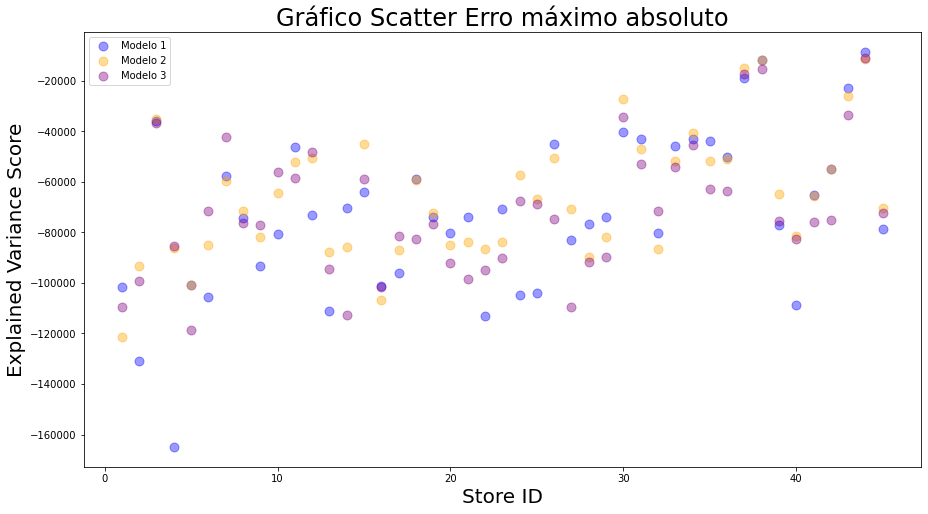

In [39]:
#Definindo Figure
plt.figure(figsize=(15,8))
#1° Scatter -> Erro máximo absoluto - Modelo 1
plt.scatter(st,mean_max_error_m, c="blue", alpha = 0.4, label="Modelo 1", s=80)
#2° Scatter -> Erro máximo absoluto - Modelo 2
plt.scatter(st,mean_max_error_m_m2, c="orange", alpha = 0.4, label="Modelo 2", s=80)
#3° Scatter -> Erro máximo absoluto - Modelo 3
plt.scatter(st,mean_max_error_m_m3, c="purple", alpha = 0.4, label="Modelo 3",s=80)
plt.title("Gráfico Scatter Erro máximo absoluto", fontsize=24)
plt.xlabel("Store ID",fontsize=20)
plt.ylabel("Explained Variance Score", fontsize=20)
plt.legend()
plt.show()

O gráfico de erro máximo absoluto, diferentemente dos outros coeficientes já analisados não induzirá ao comportamento dos modelos, ou a como as features se relacionam com a Target, mas sim no erro quantitativo que cada modelo teve ao calcular a predição da Target de cada uma das lojas, estando os três modelos próximos em comportamento gráfico. 

Havendo poucas situações em que o Modelo 2 e 3 se sobressairão perante o Modelo 1. Como é o caso visto pelo gráfico abaixo, que representa um gráfico com amplificação na área de importância:

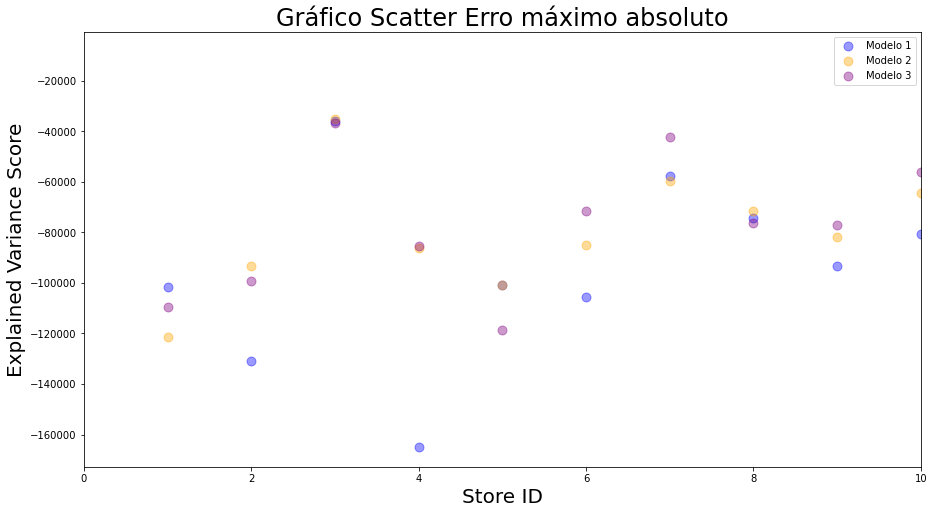

In [40]:
#Definindo Figure
plt.figure(figsize=(15,8))
#1° Scatter -> Erro máximo absoluto - Modelo 1
plt.scatter(st,mean_max_error_m, c="blue", alpha = 0.4, label="Modelo 1", s=80)
#2° Scatter -> Erro máximo absoluto - Modelo 2
plt.scatter(st,mean_max_error_m_m2, c="orange", alpha = 0.4, label="Modelo 2", s=80)
#3° Scatter -> Erro máximo absoluto - Modelo 3
plt.scatter(st,mean_max_error_m_m3, c="purple", alpha = 0.4, label="Modelo 3",s=80)
plt.title("Gráfico Scatter Erro máximo absoluto", fontsize=24)
plt.xlabel("Store ID",fontsize=20)
plt.ylabel("Explained Variance Score", fontsize=20)
plt.legend()
#Limitando X para dar efeito de Zoom
plt.xlim([0,10])
plt.show()

A situação descrita ocorre no Store ID 4, no qual o Modelo 2 e 3 conseguem fazer predições extremamente próximas, enquanto o modelo 1 teve, aproximadamente, um erro máximo absoluto de duas vezes.

<div id="Importância_Relativa_de_Feature_em_Target"></div>

#### Importância Relativa de Feature em Target

Nesta seção será possível quantificar quais Features têm maior influência no comportamento da variável principal Target. Sendo esta quantificação feita nos modelos 2 e 3, uma vez que ambos têm um Output de maior complexidade, tornando muito difícil a interpretação desta importância apenas por gráficos.

uma vez que ambos, por serem modelos arvores, detém grande complexidade em seu Output, aumentando exponencialmente a dificuldade na interpretação da importância das Features diretamente pelos gráficos - considerando isto, a biblioteca oferece funções que estruturem a importância das Features e devolva uma lista.

Abaixo estão plotados gráficos que mostrem a importância dessas Features nas 45 Lojas:

In [41]:
#Definindo Figura do Gráfico
fig, axs = plt.subplots(23,4)
fig.set_figheight(400)
fig.set_figwidth(90)
#Definindo Index de Subplots
index_p = 0
index_s = 0
#1• For -> Importância Relativa Features Modelo 2
for e in Importance_m2:
    axs[index_p,index_s].barh(["Unemployment","CPI","Fuel_Price","Temperature"], e)
    axs[index_p,index_s].set_title("Barplot - Importância Features - Modulo 2", fontsize=30, fontweight=600)
    if index_s == 3:
        index_s = 0
        index_p += 1
    else:
        index_s +=1
#2• For -> Importância Relativa Features Modelo 3
for e in Importance_m3:
    axs[index_p,index_s].barh(["Unemployment","CPI","Fuel_Price","Temperature"], e)
    axs[index_p,index_s].set_title("Barplot - Importância Features - Modelo 3", fontsize=30, fontweight=600)
    if index_s == 3:
        index_s = 0
        index_p += 1
    else:
        index_s +=1

plt.show()

Devido a quantidade de gráficos ficou bem pequeno a fonte no plot, contudo as features analizadas de cima para baixo são:

* Temperature
* Fuel_Price
* CPI
* Unemployment

Abaixo estão plotados gráficos que mostrem a média simples de importância dessas Features nas 45 Lojas:

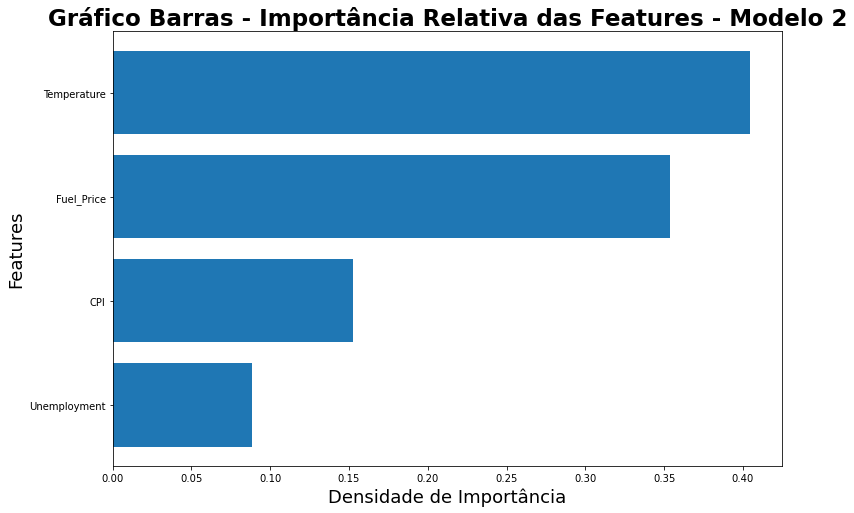

In [42]:
#Definindo Figura do Gráfico
plt.figure(figsize=(12,8))
#Plot Principal Gráfico Barras, usando Importance Features Modelos 2
plt.barh(["Unemployment","CPI","Fuel_Price","Temperature"],Importancia_Feature2)
plt.title("Gráfico Barras - Importância Relativa das Features - Modelo 2", fontsize=23, fontweight=600)
plt.xlabel("Densidade de Importância",fontsize=18)
plt.ylabel("Features",fontsize=18)
plt.show()

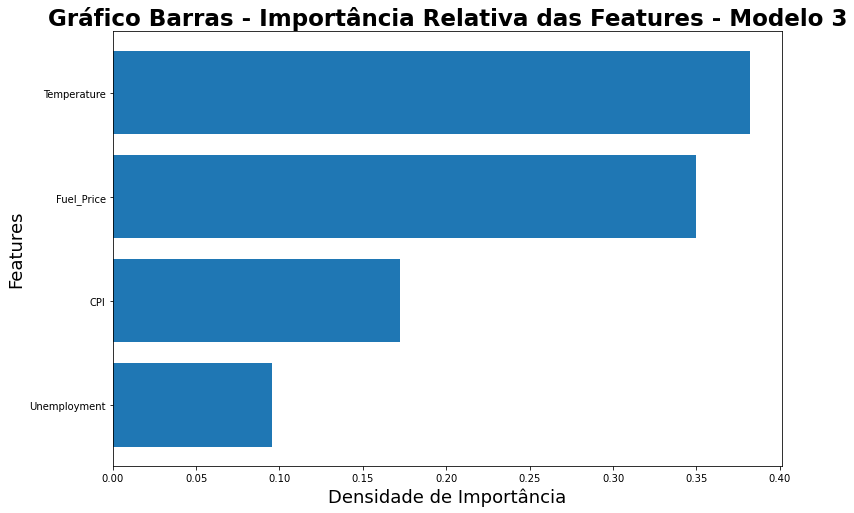

In [43]:
#Definindo Figura - Gráfico
plt.figure(figsize=(12,8))
#Plot principal Gráfico Barra, usando Importance_Features Modelo 3
plt.barh(["Unemployment","CPI","Fuel_Price","Temperature"],Importancia_Feature)
plt.title("Gráfico Barras - Importância Relativa das Features - Modelo 3", fontsize=23, fontweight=600)
plt.xlabel("Densidade de Importância",fontsize=18)
plt.ylabel("Features",fontsize=18)
plt.show()

Ao averiguar os gráficos, logo se percebe que a Feature de maior importância no Modelo 2 é Temperature, seguida por Fuel Price. As Features de menos importância são CPI e Unemployment. Já no Modelo 3 foi obtido resultados diferentes, uma vez que a Importância da Feature Temperature aumentou fortemente, sendo a principal influenciadora do comportamento de Target - em conjunto com Fuel Price; As Features CPI e Unemployment também sofrerão alterações, uma vez que tiveram aumento de:

In [44]:
print(f"O aumento da importancia de CPI foi de: {100*((Importancia_Feature[1]/Importancia_Feature2[1])-1):.3f}%")
print(f"O aumento da importancia de Unemployment foi de: {100*((Importancia_Feature[0]/Importancia_Feature2[0])-1):.3f}%")

O aumento da importancia de CPI foi de: 12.875%
O aumento da importancia de Unemployment foi de: 7.619%


___
<div id="Conclusão"></div>

### Conclusão:

A fim de concluir este projeto, há a necessidade de se retomar a pergunta norteadora, ou objetivo inicial, presente na seção de introdução. Sendo o mesmo:

Buscamos entender como o meio interno e externo impactam diretamente na quantidade de itens vendidos no Walmart nos Estados Unidos entre 5/2/2010 até 1/11/2012 (período que a base de dados abrange).

Foi possível responder este questionamento inicial, uma vez que:

A seção de análise exploratória teve como maior objetivo apresentar o dataset, mostrando como as Features se relacionam com a variável Target, buscando traçar futuras conexões que possibilitaram a construção de um novo Dataframe, desta vez, dividido na média simples das vendas semanais dos três anos - sendo media realizada através da soma e divisão da primeira semana de cada ano de cada loja.

Algo que resultou em uma grande disponibilidade de dados, que foi, mais tarde, utilizada na construção de 3 modelos - Regressão Linear, Decision Tree Regressor e Random Forest Regressor - que aplicarão métodos distintos na base de dados para tentar prever as vendas semanais futuras, e nos disponibilizar quais as principais Features e como elas impactam no comportamento da Target.

Com a construção dos modelos concluída foram construídos diversos gráficos que possibilitarão não apenas a observação de previsões futuras da variável Target, mas também quais os coeficientes de determinação, erro quadrático médio, Variação explicada e erro máximo absoluto de cada loja - uma vez que todos os modelos tinham Output independente para cada loja, algo que abriu a possibilidade de se analisar quais são as principais Features que induzem o comportamento da Target em cada loja - algo que foi realizado na seção: “Importância Relativa de Feature em Target”.

Com isso, é possível afirmar que o meio interno e externo impacta diretamente na quantidade de itens vendidos no Walmart nos Estados Unidos, sendo este impacto totalmente individual para cada loja, com grande destaque de Features como Temperature e Fuel Price que mostraram impactar fortemente o comportamento da Target, enquanto CPI e Unemployment tiveram impacto, porém menor.

___

<div id="Referências"></div>

#### Referências 

https://scikit-learn.org/stable/modules/linear_model.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

https://medium.com/pursuitnotes/decision-tree-regression-in-6-steps-with-python-1a1c5aa2ee16

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

https://ensinandomaquinasblog.wordpress.com/2017/12/15/modelos-preditivos-de-notas-de-redacao-do-enem-2015/

https://scikit-learn.org/stable/modules/tree.html

https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html#sphx-glr-auto-examples-tree-plot-tree-regression-py

https://pt.wikipedia.org/wiki/Walmart

https://www.geeksforgeeks.org/ml-linear-regression/

https://www.mathworks.com/discovery/machine-learning.html

https://pt.wikipedia.org/wiki/Aprendizado_de_máquina

https://didatica.tech/a-biblioteca-scikit-learn-pyhton-para-machine-learning/

https://www.ibm.com/br-pt/analytics/machine-learning

https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

https://levelup.gitconnected.com/random-forest-regression-209c0f354c84

https://scikit-learn.org/stable/modules/model_evaluation.html

https://pt.wikipedia.org/wiki/Erro_quadrático_médio

https://en.wikipedia.org/wiki/Explained_variation

https://en.wikipedia.org/wiki/Mean_absolute_error